# Анализ датасета от компании, которая предоставляет клиентам автомобили по подписке


1. [Анализ данных файла ga_hits-001](#section_a)
2. [Анализ данных файла ga_sessions](#section_b)
3. [Объединение датафреймов, подготовка данных для работы](#section_c)
4. [Визуализация основных параметров](#section_d)
5. [Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события](#section_e)
6. [Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события](#section_f)
7. [Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.](#section_g)
8. [Из каких источников (устройств, кампаний, локаций) идёт самый целевой трафик](#section_h)
    1. [Рейтинг устройств](#section_1)
    2. [Рейтинг кампаний](#section_2)
    3. [Рейтинг локаций](#section_3)
9. [Какие авто пользуются наибольшим спросом?](#section_i)
10. [Стоит ли увеличивать своё присутствие в соцсетях](#section_j)


# <a name="section_a"></a> Загрузка данных файла ga_hits-001

In [3]:
import pandas as pd
import datetime as dt
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from transliterate import translit, get_available_language_codes

In [9]:
ga_hits = pd.read_csv("data/ga_hits-001.csv")
ga_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


In [10]:
df_hits = ga_hits.copy()

<Axes: >

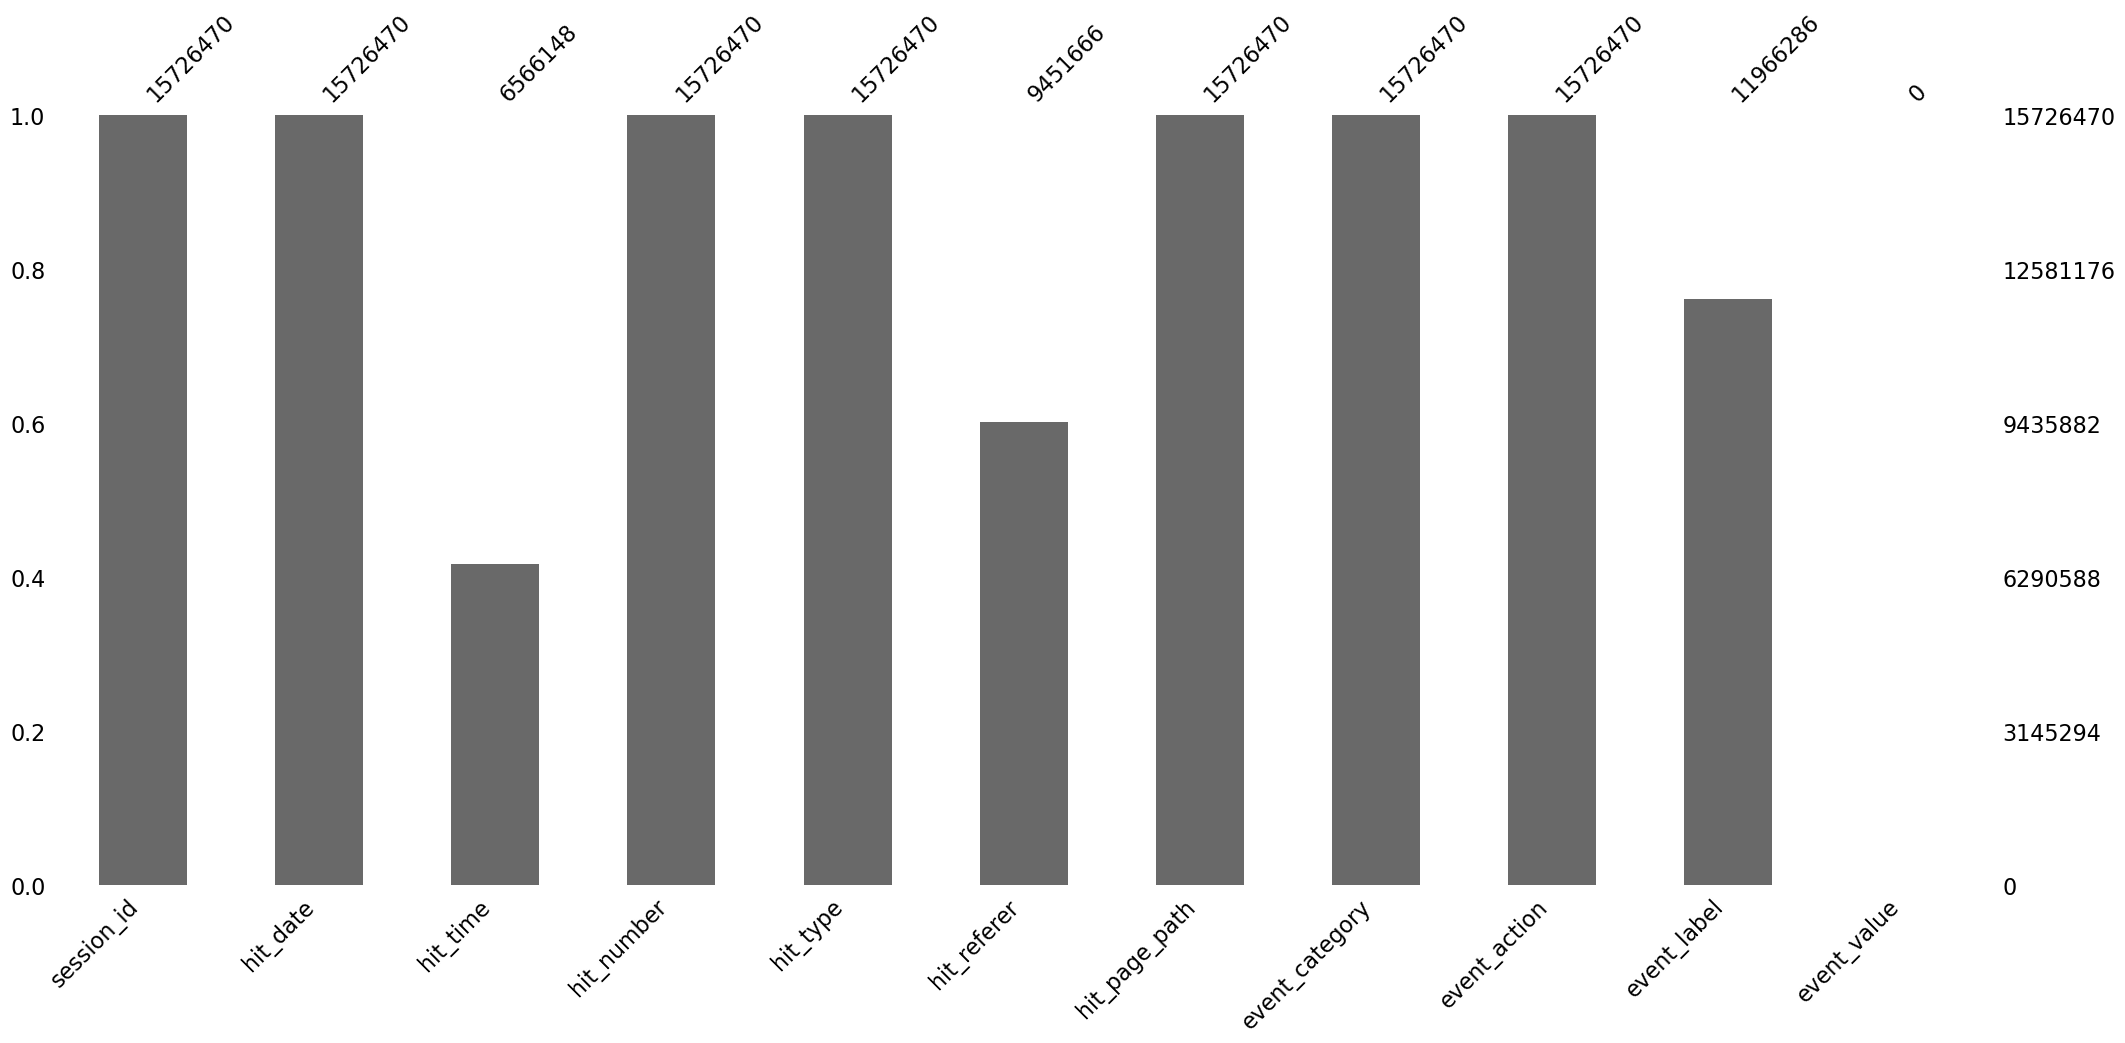

In [11]:
# график пропущенных значений
msno.bar(df_hits)

In [12]:
# в ga_hits дубликаты отсутствуют
df_hits[df_hits.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value


In [13]:
# из графика о незаполненных строках наглядно видно, что данные не заполнены в следующих столбцах: hit_time, hit_referer,
# event_label и event_value.
missing_values = ((df_hits.isna().sum()/len(df_hits))*100).sort_values()
print(f'Процент пропущенных значений: \n{missing_values}')

Процент пропущенных значений: 
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
hit_time           58.247795
event_value       100.000000
dtype: float64


In [14]:
#Колонки hit_time, hit_referer, event_label и event_value имеют процент пропусков более 20%. Они считаются
#неинформативными и будут удалены.
df_hits = df_hits.drop(columns=['hit_time', 'hit_referer', 'event_label', 'event_value'])
df_hits

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show
...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,43,event,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,40,event,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,43,event,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,45,event,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show


## Создание колонки на основе действий, совершенных пользователями сайта.

In [15]:
# целевые действия
actions = ['sub_car_claim_click',

'sub_car_claim_submit_click',

'sub_open_dialog_click',

'sub_custom_question_submit_click',

'sub_call_number_click',

'sub_callback_submit_click',

'sub_submit_success',

'sub_car_request_submit_click'
    
]

In [16]:
target = []
for i in df_hits['event_action']:
    if i in actions:
        target.append(1.0)
    else:
        target.append(0.0)
        

In [17]:
# добавление колонки с целевой переменной в датафрейм
df_hits['target'] = target

### Выделение названий автомобилей из колонки hit_page_path

In [18]:
def parsing_auto(df):
    list_auto =[]
    list_model = []
    for str_auto in df['hit_page_path']:
        if str_auto.startswith('podpiska.sberauto.com'):
            list_auto.append('other')
        else:
            if str_auto.startswith('sberauto.com/cars/all/'):
                mark = str_auto.split('/')[3]
                list_auto.append(mark)
            elif str_auto.startswith('sberauto.com/cars/'):
                mark = str_auto.split('/')[2].split('?')[0]

                list_auto.append(mark)
            elif str_auto.startswith('client.saptest.sberauto-team.com/cars/all/'):
                mark = str_auto.split('/')[3]
                list_auto.append(mark)

            else:
                list_auto.append('other')

    
    
            
    return list_auto


In [19]:
# поиск по арендованным автомобилям
df_for_auto = df_hits[df_hits['target']==1]


In [20]:
list_auto = parsing_auto(df_for_auto)

list_auto = set(list_auto)


In [21]:
# list_auto содержит названия автомобилей в буквенно-циферном виде. Чтобы почистить список от таких значений, используется следующий цикл
auto_in_search = []
for x in list_auto:
    if x.split('_')[0].isalpha() or x.split('-')[0].isalpha():
        x = x.split('_')[0]
        auto_in_search.append(x)


In [22]:
brand =[]
model =[]
for str_auto in df_hits['hit_page_path']:
    for auto in auto_in_search:
    
        if auto in str_auto:
            brand.append(auto)
            if str_auto.startswith('sberauto.com/cars/all/') or str_auto.startswith('client.saptest.sberauto-team.com/cars/all/'):
                mod =str_auto.split('/')[4].split('?')[0] 
                model.append(mod)
            else:
                model.append('other')
            break

        else:
            if auto == auto_in_search[-1]:
                brand.append('other')
                model.append('other')
            continue
df_hits['auto'] = brand
df_hits['model'] = model

In [23]:
df_hits['list_auto'] = df_hits['auto'] +'_' + df_hits['model']
df_hits = df_hits.drop(columns=['auto', 'model'])


In [24]:
# df_hits готов к объединению

df_hits1 = df_hits.groupby('session_id').agg({'target': 'max'}).reset_index()


In [25]:
df_hits1[df_hits1['target']==1]

,session_id,target
31,1000136488597247974.1639897063.1639897063,1.0
89,1000389444973162418.1621946290.1621946290,1.0
120,1000512929594478414.1638534989.1638534989,1.0
248,1001214989243294231.1638179143.1638179143,1.0
298,100138766161469545.1632428137.1632428137,1.0
...,...,...
1734552,999746093241558256.1632212924.1632212924,1.0
1734566,999806708110929695.1628076098.1628076098,1.0
1734584,999819477043134339.1621901188.1621901188,1.0
1734589,999869672343970659.1639949158.1639949158,1.0


# <a name="section_b"></a> Загрузка данных файла ga_sessions


In [26]:
ga_sessions = pd.read_csv("data/ga_sessions.csv", low_memory=False)
ga_sessions

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [27]:
df_session = ga_sessions.copy()

<Axes: >

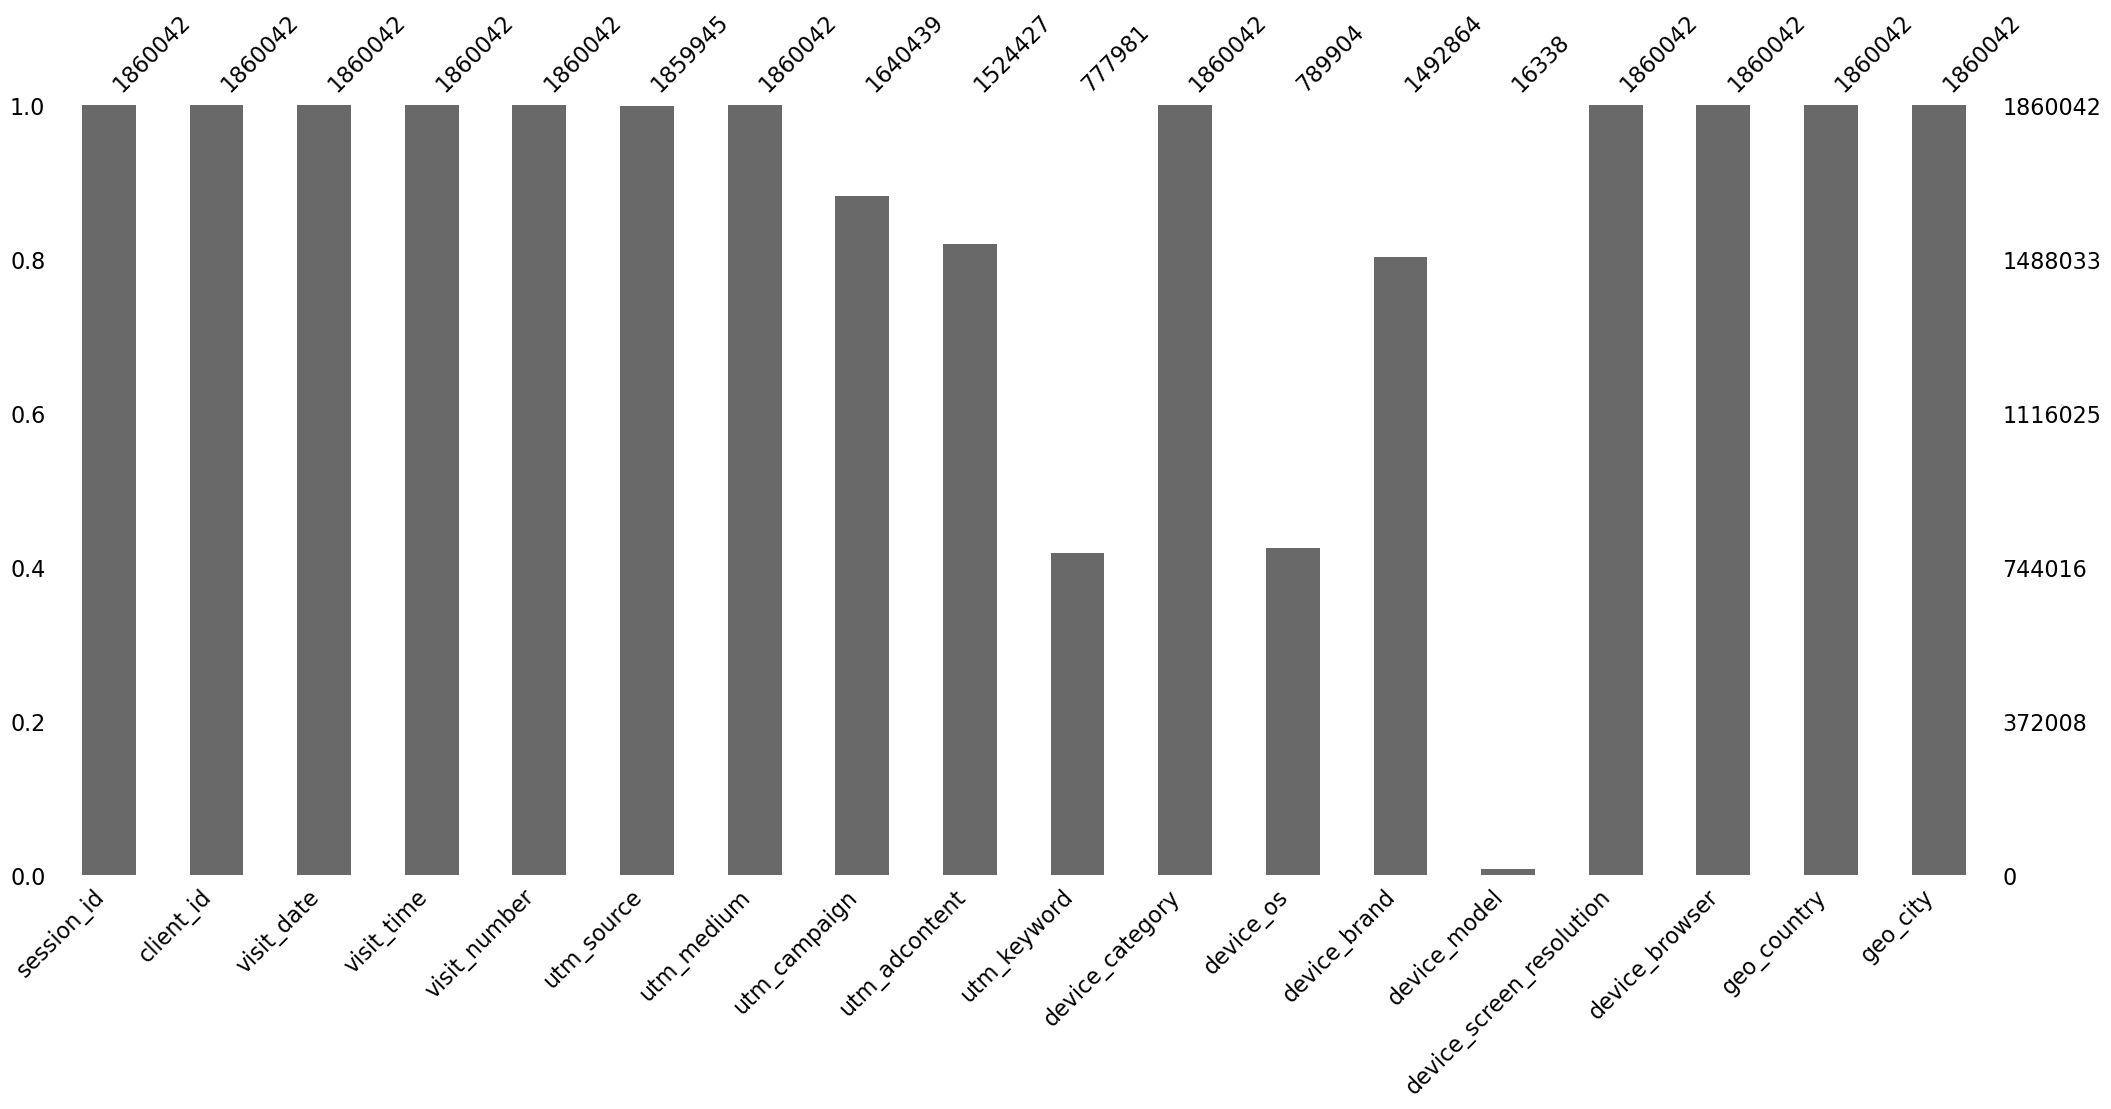

In [28]:
msno.bar(df_session)

In [29]:
# Наглядно видно, что есть пропуски в столбцах.
# Оценка количества пропусков в df_session

missing_values = ((df_session.isna().sum()/len(df_session))*100).sort_values()
print(f'Процент пропущенных значений: \n{missing_values}')

Процент пропущенных значений: 
session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64


# <a name="section_c"></a>Объединение датафреймов

In [30]:
df = pd.merge(left=df_session, right=df_hits1, on='session_id', how= 'inner')
df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow,0.0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol,0.0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,0.0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,0.0


In [31]:
# дубликаты отсутствуют
df[df.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target


<Axes: >

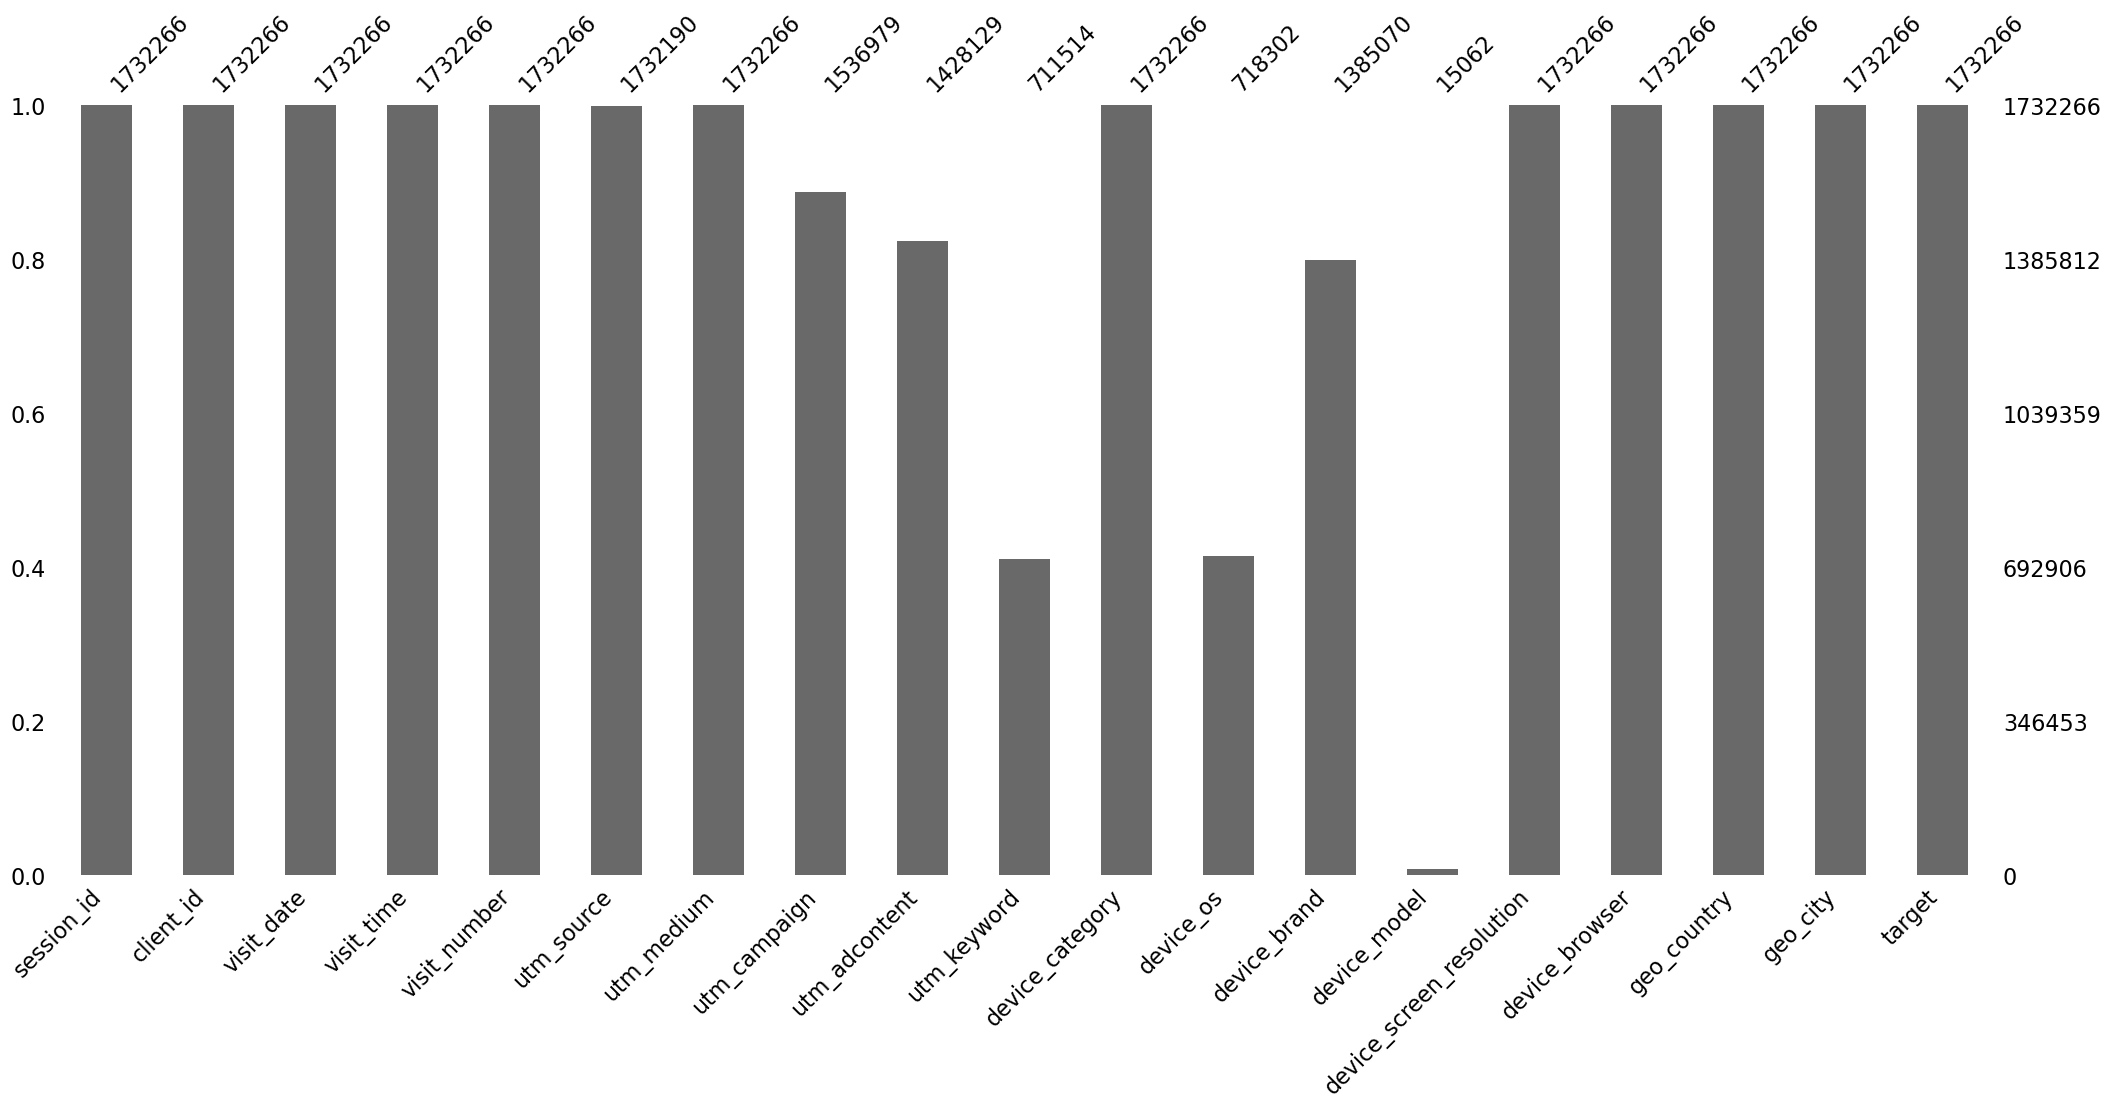

In [32]:
msno.bar(df)

In [33]:
missing_values = ((df.isna().sum()/len(df))*100).sort_values()
print(f'Процент пропущенных значений: \n{missing_values}')

Процент пропущенных значений: 
session_id                   0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_city                     0.000000
target                       0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_medium                   0.000000
utm_source                   0.004387
utm_campaign                11.273500
utm_adcontent               17.557177
device_brand                20.042880
device_os                   58.533966
utm_keyword                 58.925823
device_model                99.130503
dtype: float64


In [34]:
# Очевидно, что колонки utm_keyword и device_model не информативны из-за большого числа пропусков, 
# которые не представляется возможным заполнить
df = df.drop(columns=['utm_keyword','device_model'])
df


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,desktop,Windows,NaN,1920x1080,Chrome,Russia,Moscow,0.0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,Apple,390x844,Safari,Russia,Stavropol,0.0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Moscow,0.0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0.0


### обработка пропусков в колонке  utm_source

In [35]:
df.utm_source.value_counts(dropna=False)

ZpYIoDJMcFzVoPFsHGJL    552555
fDLlAcSmythWSCVMvqvL    277060
kjsLglQLzykiRbcDiGcD    245178
MvfHsxITijuriZxsqZqt    175831
BHcvLfOaCWvWTykYqHVe    110963
                         ...  
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
VdeFdoGCqZBxFfKSHNLl         1
RzLAoRYmCtVATSoPvWAQ         1
nVVduuqoxTOGBvvhENWW         1
Name: utm_source, Length: 281, dtype: int64

In [36]:
# незаполненных значений в колонке utm_source совсем немного.
df['utm_source'].isna().sum()

76

In [37]:
# удалять нельзя, так как присутствуют целевые события
df_utm_source = df[df['utm_source'].isna()]
df_utm_source[df_utm_source['target']==1]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
347636,2424368861086365816.1637069960.1637069960,564467362.1636972664,2021-11-16,16:39:20,4,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Samsung,412x915,Chrome,Russia,Chelyabinsk,1.0
805010,461530448458434508.1637849095.1637849095,107458431.1633961932,2021-11-25,17:04:55,40,NaN,CPM,IKQsApKuPmZqqmhieEgf,NaN,desktop,Macintosh,NaN,1440x900,Chrome,Russia,Moscow,1.0
1114789,6101018397274780643.1638962185.1638962185,1420504040.1638904803,2021-12-08,14:16:25,3,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Huawei,360x780,Chrome,Russia,Moscow,1.0
1235510,6675031872911888372.1637651415.1637651415,1554151967.1632817140,2021-11-23,10:10:15,58,NaN,CPM,IKQsApKuPmZqqmhieEgf,NaN,desktop,Macintosh,NaN,1792x1120,Chrome,Russia,Moscow,1.0
1235522,6675031872911888372.1638962159.1638962159,1554151967.1632817140,2021-12-08,14:15:59,83,NaN,CPM,IKQsApKuPmZqqmhieEgf,NaN,desktop,Macintosh,NaN,1792x1120,Chrome,Russia,Moscow,1.0


In [38]:
# заполнение колонки значением 'other' и проверка отсутствующих значений
df_clean = df.copy()
df_clean.utm_source = df_clean.utm_source.fillna('other')
df_clean.utm_source.isna().sum()

0

### заполнение пропущенных значений

In [39]:
df_clean['utm_adcontent'].isna().sum()

304137

In [40]:
# для заполнения колонки utm_adcontent выбирается вариант other
df_clean['utm_adcontent'].value_counts(ascending=False)/len(df)*100

JNHcPlZPxEMWDnRiyoBf    53.999097
vCIpmpaGBnIQhyYNkXqp    10.358571
xhoenQgDQsgfEPYNPwKO     6.025691
PkybGvWbaqORmxjNunqZ     3.408137
LLfCasrxQzJIyuldcuWy     1.047068
                          ...    
fiImkyBmzQSeAeQEVCDZ     0.000058
uUDFLZnWKzkthhRGUTvb     0.000058
vXARZToVDdvNhALiQtvl     0.000058
gQEnaeQmOHisHSTEyzhp     0.000058
oJivRDNIrrOckRBIKOtG     0.000058
Name: utm_adcontent, Length: 280, dtype: float64

In [41]:
# заполнение колонки
df_clean.utm_adcontent = df_clean['utm_adcontent'].fillna('other')

In [42]:
#проверка на пропущеные значения в колонке
df_clean['utm_adcontent'].isnull().sum()

0

In [43]:
df_clean.utm_campaign.isnull().sum()

195287

In [44]:
# заполнение колонки будет значением 'other', поскольку явного популярного значения нет
df_clean['utm_campaign'].value_counts(ascending=False)/len(df)*100

LTuZkdKfxRGVceoWkVyg    24.418421
LEoPHuyFvzoNfnzGgfcd    18.547152
FTjNLDyTrXaWYgZymFkV    13.563159
gecBYcKZCPMcVYdSSzKP     7.692063
XHNUiSKKGTEpSAlaVMFQ     1.371037
                          ...    
zXjuoqEaPElBnwpSHMpx     0.000058
cqgnjDbqrtCipVvzhxqa     0.000058
AdtHYglxfCpTpwZeTAuW     0.000058
qPDTdivQVeflLjTYIJnG     0.000058
cXxuwXPoQCvAXPHpFcZl     0.000058
Name: utm_campaign, Length: 406, dtype: float64

In [45]:
# запонление и проверка на пропущенные значения
df_clean.utm_campaign = df_clean['utm_campaign'].fillna('other')
df_clean.utm_campaign.isnull().sum()

0

In [46]:
df_clean.isnull().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                        0
utm_medium                        0
utm_campaign                      0
utm_adcontent                     0
device_category                   0
device_os                   1013964
device_brand                 347196
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
target                            0
dtype: int64

In [47]:
df_clean.device_os.value_counts()

Android          425520
iOS              182597
Windows           81740
Macintosh         23415
Linux              4616
(not set)           309
Chrome OS            65
BlackBerry           24
Tizen                 7
Firefox OS            3
Nokia                 2
Samsung               2
Windows Phone         2
Name: device_os, dtype: int64

In [48]:
# пропуски в device_brand заполнить не удастся, но можно с ее помощью заполнить колонку device_os
df.device_brand.value_counts()

Apple        503533
Samsung      311641
Xiaomi       269251
Huawei       173828
Realme        17926
              ...  
Smarteo           1
Star              1
Mobiistar         1
Fero              1
Maxvi             1
Name: device_brand, Length: 200, dtype: int64

In [49]:
Android = [
    'Samsung',
    'Huawei',
    'Xiaomi',
    'BQ',
    'Realme',
    'Honor',
    'Infinix',
    'Meizu',
    'Motorola',
    'OnePlus',
    'OPPO',
    'POCO',
    'Redmi',
    'Tecno',
    'vivo'
]

In [50]:
df_clean.device_os = df_clean['device_os'].fillna(df['device_brand'].apply(lambda x: 'iOS' if x == 'Apple' else ('Android' if x in Android else 'other')))


In [51]:
df_clean.device_os.value_counts()

Android          842027
iOS              503538
other            276516
Windows           81740
Macintosh         23415
Linux              4616
(not set)           309
Chrome OS            65
BlackBerry           24
Tizen                 7
Firefox OS            3
Nokia                 2
Samsung               2
Windows Phone         2
Name: device_os, dtype: int64

In [52]:
df_clean['device_os'] = df_clean['device_os'].apply(lambda x: 'other' if x=='(not set)' else x)


In [53]:
df_clean.device_brand = df_clean['device_brand'].fillna('other')

In [54]:
# пропущенных значений нет
df_clean.isnull().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
target                      0
dtype: int64

In [55]:
# приведение типов
df_clean.client_id.astype('float')
pd.to_datetime(df_clean.visit_date, utc=True)
pd.to_datetime(df_clean.visit_time)

0         2024-01-24 14:36:32
1         2024-01-24 08:21:30
2         2024-01-24 02:42:06
3         2024-01-24 05:00:00
4         2024-01-24 05:00:00
                  ...        
1732261   2024-01-24 10:48:25
1732262   2024-01-24 08:00:00
1732263   2024-01-24 15:31:55
1732264   2024-01-24 15:36:44
1732265   2024-01-24 19:39:02
Name: visit_time, Length: 1732266, dtype: datetime64[ns]

# <a name="section_d"></a> Визуализация основных параметров

In [56]:
df_work = df_clean.copy()
df_work.visit_date = pd.to_datetime(df_work.visit_date, utc=True)
df_work['month'] = df_work.visit_date.dt.month
df_work

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target,month
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0.0,11
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0.0,11
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0.0,12
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,5
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22 00:00:00+00:00,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,Windows,other,1920x1080,Chrome,Russia,Moscow,0.0,12
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26 00:00:00+00:00,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,390x844,Safari,Russia,Stavropol,0.0,5
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15 00:00:00+00:00,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Moscow,0.0,11
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29 00:00:00+00:00,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0.0,11


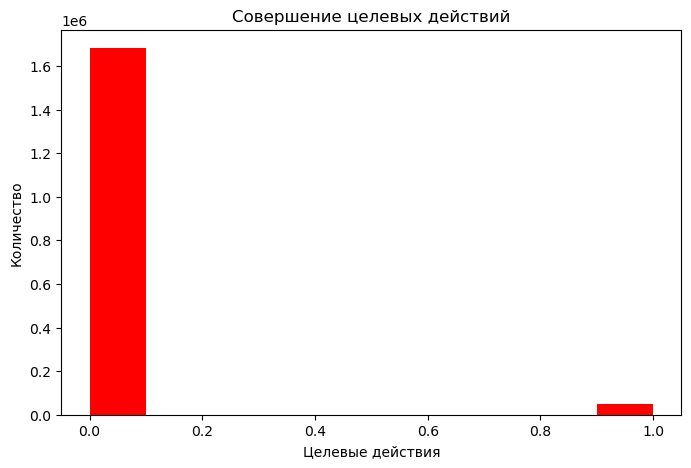

In [57]:
plt.figure(figsize=(8,5))
plt.hist(df_work.target, color='red')
plt.title('Совершение целевых действий')
plt.xlabel('Целевые действия')
plt.ylabel('Количество')
plt.show();

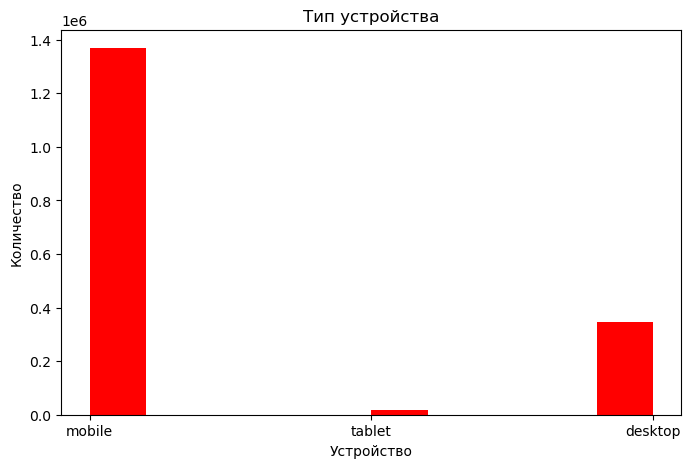

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df_work.device_category, color='red')
plt.title('Тип устройства' )
plt.xlabel('Устройство')
plt.ylabel('Количество')
plt.show();

In [59]:
# зависимость целевого действия от даты визита
df_date = df_work.groupby(['visit_date'], as_index=False)[['target']].sum()

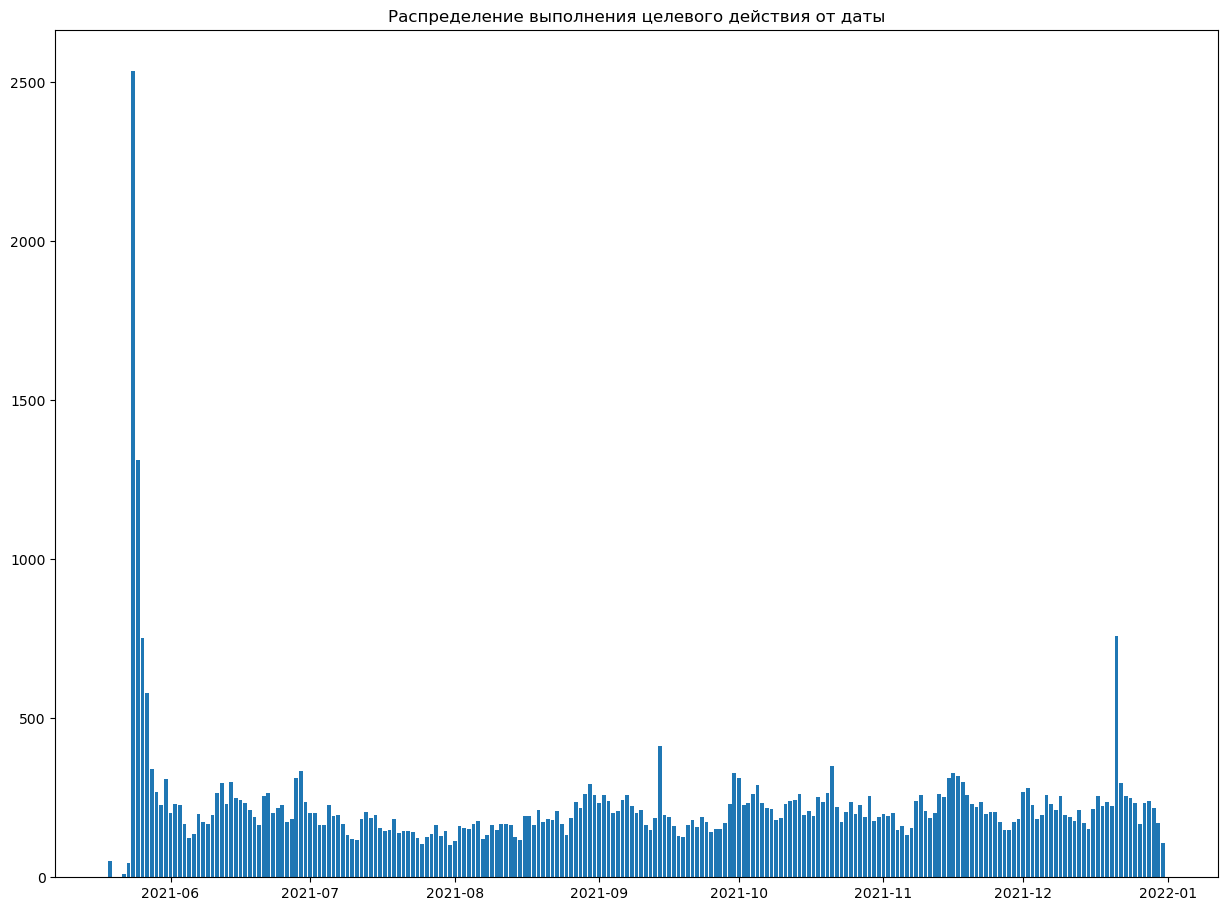

In [60]:
plt.figure(figsize=(15,11))
plt.title('Распределение выполнения целевого действия от даты')
plt.bar(df_date.visit_date, df_date.target);

In [61]:
df_date.sort_values(by='target', ascending=False)[:15]

,visit_date,target
4,2021-05-24 00:00:00+00:00,2536.0
5,2021-05-25 00:00:00+00:00,1311.0
215,2021-12-21 00:00:00+00:00,759.0
6,2021-05-26 00:00:00+00:00,751.0
7,2021-05-27 00:00:00+00:00,580.0
117,2021-09-14 00:00:00+00:00,412.0
154,2021-10-21 00:00:00+00:00,350.0
8,2021-05-28 00:00:00+00:00,339.0
40,2021-06-29 00:00:00+00:00,333.0
180,2021-11-16 00:00:00+00:00,328.0


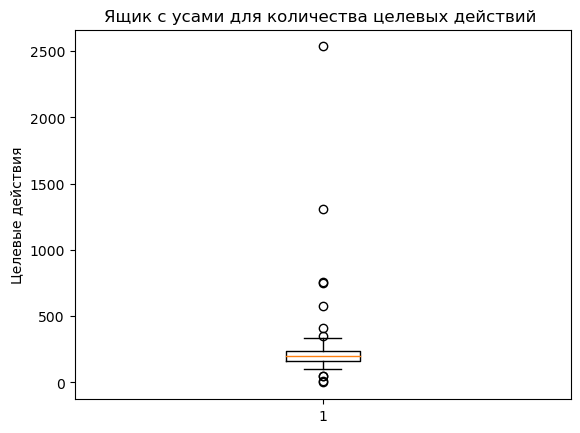

In [62]:
plt.boxplot(df_date.target)
plt.ylabel('Целевые действия')
plt.title('Ящик с усами для количества целевых действий ')
plt.show();

In [63]:
df_date.describe()

,target
count,226.000000
mean,222.628319
std,189.349586
min,0.000000
25%,165.000000
50%,199.000000
75%,237.000000
max,2536.000000


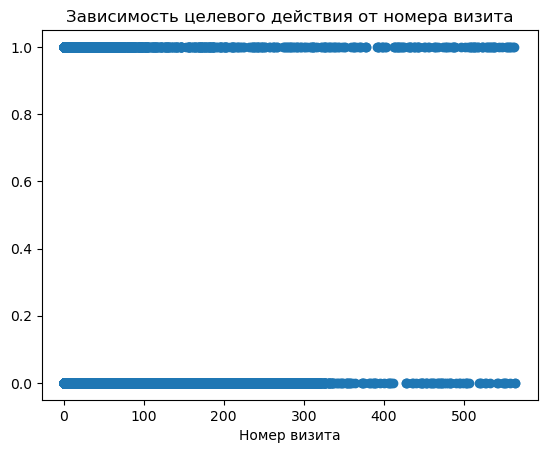

In [64]:
# целевое действие может произойти при любом номере визита
plt.figure()
plt.scatter(df_work.visit_number, df_work.target)
plt.title('Зависимость целевого действия от номера визита')
plt.xlabel('Номер визита')
plt.show();

C:\Users\Acer\AppData\Local\Temp\ipykernel_6996\3539280181.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(data= df_work.corr(), annot=True, center=2)


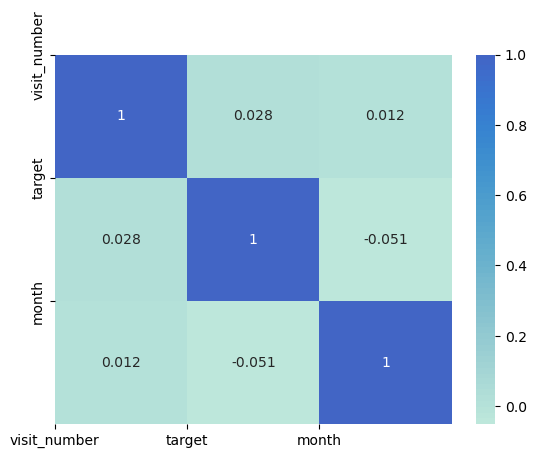

In [65]:
column =['visit_number', 'target', 'month']
plot = sns.heatmap(data= df_work.corr(), annot=True, center=2)
plt.xticks(range(0, len(column)),column)
plt.yticks(range(0, len(column)),column)
plt.show()

### Слабая корреляция присутствует между целевым действием и месяцем визита


# <a name="section_e"></a> Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

In [66]:
#выделение органического трафика
df_organic = df_work[df_work['utm_medium'].isin(['organic','referral','(none)'])]
df_organic

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target,month
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31 00:00:00+00:00,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x812,Safari,Russia,Saint Petersburg,0.0,5
11,9055469620715506713.1628883994.1628883994,2108390820.1628883993,2021-08-13 00:00:00+00:00,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0.0,8
12,9055469620715506713.1633110583.1633110583,2108390820.1628883993,2021-10-01 00:00:00+00:00,20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0.0,10
13,9055469620715506713.1635878177.1635878177,2108390820.1628883993,2021-11-02 00:00:00+00:00,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Samsung,412x869,Android Webview,Russia,Sochi,0.0,11
28,9055505230298952295.1638478433.1638478433,2108399111.1638478439,2021-12-02 00:00:00+00:00,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,other,1536x864,Chrome,Russia,Balashikha,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732251,9055355469082180480.1636350848.1636350848,2108364242.1636350848,2021-11-08 00:00:00+00:00,08:54:08,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x873,Chrome,Russia,Moscow,0.0,11
1732254,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04 00:00:00+00:00,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,other,other,1920x1080,Chrome,Russia,Khimki,1.0,9
1732257,9055394269810294140.1629912447.1629912447,2108373276.1629912444,2021-08-25 00:00:00+00:00,20:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Samsung,360x800,Android Webview,Russia,Saint Petersburg,1.0,8
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26 00:00:00+00:00,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,390x844,Safari,Russia,Stavropol,0.0,5


In [67]:
# конверсия органического трафика по месяцам
df_organic_CR = df_organic.groupby(['month'], as_index=False).agg({'session_id': 'count','target':'sum' })
df_organic_CR['CR_organic'] = df_organic_CR.apply(lambda x: x.target/x.session_id, axis=1)
df_organic_CR = df_organic_CR[['month','CR_organic']]
df_organic_CR

,month,CR_organic
0,5,0.067426
1,6,0.059006
2,7,0.043802
3,8,0.046843
4,9,0.034255
5,10,0.036707
6,11,0.024718
7,12,0.021201


In [68]:
# выделение платного трафика
df_paid = df_work[~df_work.isin(df_organic)]
df_paid

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target,month
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 00:00:00+00:00,14:36:32,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0.0,11.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14 00:00:00+00:00,08:21:30,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0.0,11.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 00:00:00+00:00,02:42:06,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0.0,12.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29 00:00:00+00:00,05:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,5.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29 00:00:00+00:00,05:00:00,2.0,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22 00:00:00+00:00,10:48:25,1.0,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,Windows,other,1920x1080,Chrome,Russia,Moscow,0.0,12.0
1732262,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1732263,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29 00:00:00+00:00,15:36:44,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0.0,11.0


In [69]:
# конверсия платного трафика по месяцам
df_paid_CR = df_paid.groupby(['month'], as_index=False).agg({'session_id': 'count','target':'sum' })
df_paid_CR['CR_paid'] = df_paid_CR.apply(lambda x: x.target/x.session_id, axis=1)
df_paid_CR = df_paid_CR[['month','CR_paid']]
df_paid_CR

,month,CR_paid
0,5.0,0.008498
1,6.0,0.029448
2,7.0,0.021292
3,8.0,0.030281
4,9.0,0.021813
5,10.0,0.024819
6,11.0,0.024342
7,12.0,0.019740


##### объединение 2 датафреймов по месяцу для применения статистического критерия

In [70]:
df_CR = pd.merge(left = df_organic_CR, right=df_paid_CR, on='month')
df_CR

,month,CR_organic,CR_paid
0,5,0.067426,0.008498
1,6,0.059006,0.029448
2,7,0.043802,0.021292
3,8,0.046843,0.030281
4,9,0.034255,0.021813
5,10,0.036707,0.024819
6,11,0.024718,0.024342
7,12,0.021201,0.019740


## Гипотеза. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события
### Н0 Трафики не отличаются
### Н1 Трафики отличаются

####  1.проверка нормальности распределения данных (н0 случайная величина распределена нормально)

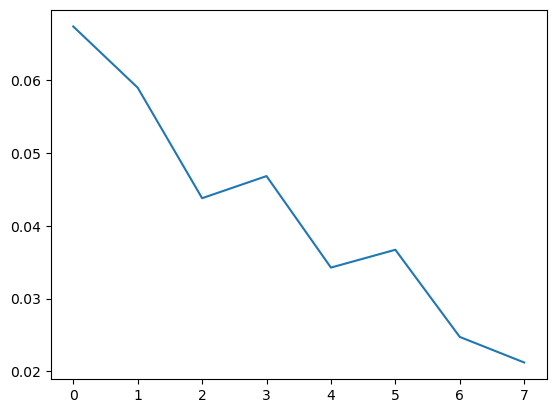

In [71]:
plt.plot(df_CR.CR_organic);

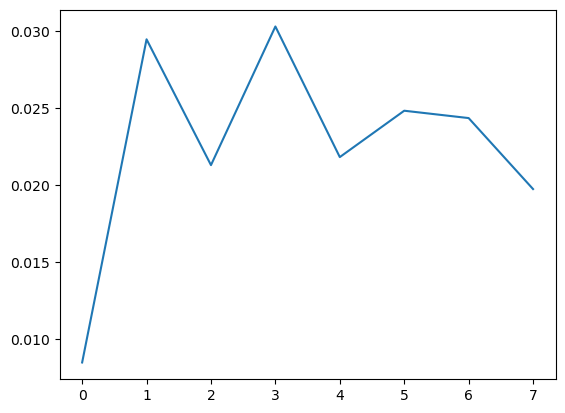

In [72]:
plt.plot(df_CR.CR_paid);

In [73]:
# тест Шапиро-Уилка на нормальность распределения данных для органического и платного трафика при уровне значимости 5%
print(f'Органический трафик: {stats.shapiro(df_CR.CR_organic)}')
print(f'Платный трафик: {stats.shapiro(df_CR.CR_paid)}')

Органический трафик: ShapiroResult(statistic=0.963189959526062, pvalue=0.839881181716919)
Платный трафик: ShapiroResult(statistic=0.8953728079795837, pvalue=0.26232755184173584)


##### в обоих случаях pvalue > 5%, следовательно, данные распределены нормально

#### 2. проверка равенства дисперсий (н0 дисперсии равны)

#### тест Левена

In [74]:
# проверка равенства дисперсий при уровне значимости 5%
stats.levene(df_CR.CR_organic, df_CR.CR_paid)

LeveneResult(statistic=4.953205245800918, pvalue=0.042985686084793175)

##### pvalue = 4.3%, Н0 можно отбросить. Следовательно, дисперсии не равны

#### 3. Выборки независимы, что очевидно

In [75]:
#  На основании предыдущих проверок для проверки гипотезы выбирается Т-критерий Уэлча
stats.ttest_ind(df_CR.CR_organic, df_CR.CR_paid, equal_var=False)

Ttest_indResult(statistic=3.134636078858998, pvalue=0.01132992726082882)

### Вывод: органический и платный трафики различаются

# <a name="section_f"></a>Гипотеза. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события
### Н0 Трафики не отличаются
### Н1 Трафики отличаются

In [76]:
df_mobile = df_work[df_work['device_category'].isin(['mobile', 'tablet'])]


In [77]:
df_mobile_CR = df_mobile.groupby(['month'], as_index=False).agg({'session_id': 'count','target':'sum' })
df_mobile_CR['mobile'] = df_mobile_CR.apply(lambda x: x.target/x.session_id, axis=1)
df_mobile_CR = df_mobile_CR[['month','mobile']]
df_mobile_CR

,month,mobile
0,5,0.057317
1,6,0.036338
2,7,0.030488
3,8,0.035387
4,9,0.024447
5,10,0.026759
6,11,0.024178
7,12,0.020029


In [78]:
df_desktop = df_work[~df_work.isin(df_mobile)]

In [79]:
df_desktop_CR = df_desktop.groupby(['month'], as_index=False).agg({'session_id': 'count','target':'sum' })
df_desktop_CR['desktop'] = df_desktop_CR.apply(lambda x: x.target/x.session_id, axis=1)
df_desktop_CR = df_desktop_CR[['month','desktop']]
df_desktop_CR

,month,desktop
0,5.0,0.069966
1,6.0,0.064637
2,7.0,0.022847
3,8.0,0.035729
4,9.0,0.025804
5,10.0,0.028344
6,11.0,0.025519
7,12.0,0.019235


In [80]:
# подготовка закончена
df_CR_device = pd.merge(left = df_mobile_CR, right=df_desktop_CR, on='month')
df_CR_device

,month,mobile,desktop
0,5,0.057317,0.069966
1,6,0.036338,0.064637
2,7,0.030488,0.022847
3,8,0.035387,0.035729
4,9,0.024447,0.025804
5,10,0.026759,0.028344
6,11,0.024178,0.025519
7,12,0.020029,0.019235


####  1.проверка нормальности распределения данных (н0 случайная величина распределена нормально)

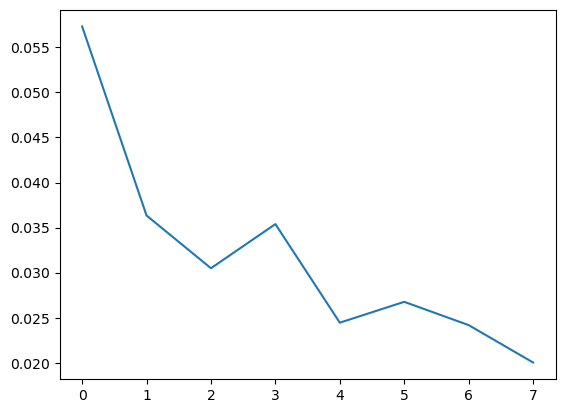

In [81]:
plt.plot(df_CR_device.mobile);

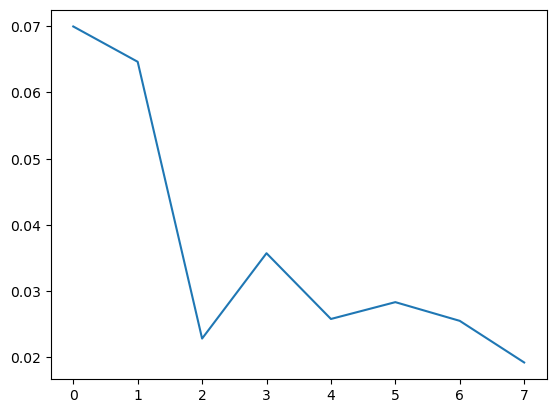

In [82]:
plt.plot(df_CR_device.desktop);

In [83]:
# тест Шапиро-Уилка на нормальность распределения данных для используемых устройств при уровне значимости 5%
print(f'Мобильные устройства(телефон/планшет): {stats.shapiro(df_CR_device.mobile)}')
print(f'Компьютер: {stats.shapiro(df_CR_device.desktop)}')

Мобильные устройства(телефон/планшет): ShapiroResult(statistic=0.8460109829902649, pvalue=0.08678115159273148)
Компьютер: ShapiroResult(statistic=0.7789427638053894, pvalue=0.01696491241455078)


##### в одном из случаев  pvalue > 5%, а в другом меньше, следовательно, выборки не из нормального распределения

#### 2. так как выборки не из кормального распределения, о равенстве дисперсий речи не идет. 
#### 3. выборки независимы

In [84]:
#  На основании предыдущих проверок для гипотезы выбирается критерий Манна-Уитни
stats.mannwhitneyu(df_CR_device.mobile, df_CR_device.desktop)

MannwhitneyuResult(statistic=31.0, pvalue=0.959129759129759)

### Вывод: трафик с мобильных устройств не отличается от трафика с десктопных

# <a name="section_g"></a> Гипотеза. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
### Н0 Трафики не отличаются
### Н1 Трафики отличаются

In [85]:
df_city = df_work.copy()

In [87]:
# загрузка файла с городами московской области
capitals = [
    'Moscow',
    'Saint Petersburg'
]
cities = pd.read_excel('data/Cities.xlsx', header=None)
city_en =[]
for city in cities[0]:
    x = translit(city,'ru', reversed=True)
    city_en.append(x)
city_en

['Aprelevka',
 'Balashiha\xa0',
 'Bronnitsy',
 'Vereja',
 'Vidnoe',
 'Volokolamsk',
 'Voskresensk',
 'Vysokovsk',
 'Golitsyno',
 'Dzerzhinskij',
 'Dmitrov',
 'Dolgoprudnyj',
 'Domodedovo',
 'Drezna',
 'Dubna',
 "Egor'evsk",
 'Zhukovskij',
 'Zarajsk',
 'Zvenigorod',
 'Ivanteevka',
 'Istra',
 'Kashira\xa0',
 'Klimovsk',
 'Klin',
 'Kolomna',
 'Korolev',
 "Kotel'niki",
 'Krasmoarmejsk',
 'Krasnogorsk',
 'Krasnozavodsk',
 'Krasnoznamensk',
 'Kubinka',
 'Kurovskoe',
 'Likino-Dulevo',
 'Lobnja',
 'Losino-Petrovskij',
 'Luhovitsy',
 'Lytkarino',
 'Ljubertsy',
 'Mozhajsk',
 'Mytischi',
 'Naro-Fominsk',
 'Noginsk',
 'Odintsovo',
 'Ozery',
 'Orehovo-Zuevo',
 'Pavlovskij Posad',
 'Peresvet',
 "Podol'sk",
 'Protvino',
 'Pushkino',
 'Puschino',
 'Ramenskoe',
 'Reutov',
 "Roshal'",
 'Ruza',
 'Sergiev Posad',
 'Serpuhov',
 'Solnechnogorsk',
 'Staraja Kupavna',
 'Stupino',
 'Taldom',
 'Frjazino',
 'Himki',
 "Hot'kovo",
 'Chernogolovka\xa0',
 'Chehov',
 'Shatura',
 'Schelkovo',
 'Elektrogorsk',
 "Elektr

In [88]:
# только российские города
rus_city = df_city[df_city['geo_country']=='Russia']

In [89]:
city = []
        
for x in rus_city['geo_city']:
    if x in (capitals or city_en):
        city.append(1)
    else:
        city.append(0)
rus_city['city'] = city
capital_city = rus_city[rus_city['city']==1]
province_city = rus_city[rus_city['city']==0]

# значение CR для столиц
capital_city_CR = capital_city.groupby(['month'], as_index=False).agg({'session_id': 'count','target':'sum' })
capital_city_CR['capital'] = capital_city_CR.apply(lambda x: x.target/x.session_id, axis=1)
capital_city_CR = capital_city_CR[['month','capital']]
# значение CR для провинции
province_city_CR = province_city.groupby(['month'], as_index=False).agg({'session_id': 'count','target':'sum' })
province_city_CR['province'] = province_city_CR.apply(lambda x: x.target/x.session_id, axis=1)
province_city_CR = province_city_CR[['month','province']]

C:\Users\Acer\AppData\Local\Temp\ipykernel_6996\1034587319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_city['city'] = city


In [90]:
df_CR_city = pd.merge(left = capital_city_CR, right=province_city_CR, on='month')
df_CR_city

,month,capital,province
0,5,0.060329,0.064069
1,6,0.041601,0.041576
2,7,0.030714,0.023113
3,8,0.034652,0.037752
4,9,0.023789,0.027425
5,10,0.026664,0.028429
6,11,0.024003,0.025415
7,12,0.021812,0.017904


####  1.проверка нормальности распределения данных (н0 случайная величина распределена нормально)

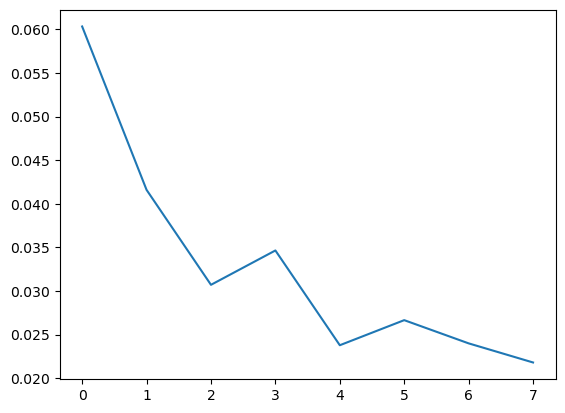

In [91]:
plt.plot(df_CR_city.capital);

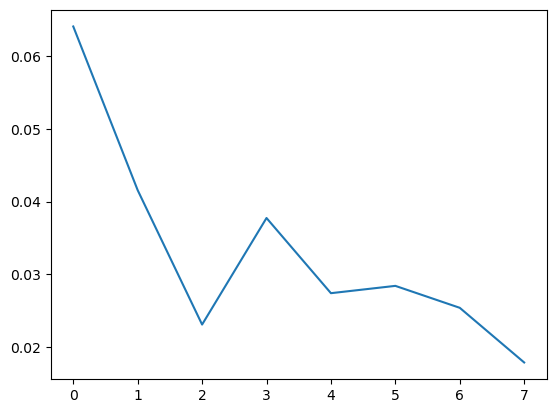

In [92]:
plt.plot(df_CR_city.province);

In [93]:
# тест Шапиро-Уилка на нормальность распределения данных для городов присутствия при уровне значимости 5%
print(f'Москва и область, Санкт-Петербург: {stats.shapiro(df_CR_city.capital)}')
print(f'Регионы: {stats.shapiro(df_CR_city.province)}')

Москва и область, Санкт-Петербург: ShapiroResult(statistic=0.8302722573280334, pvalue=0.05975564569234848)
Регионы: ShapiroResult(statistic=0.8656949996948242, pvalue=0.13674762845039368)


##### в обоих случаях pvalue > 5%, следовательно, данные распределены нормально

#### 2. проверка равенства дисперсий (н0 дисперсии равны)

#### тест Левена

In [94]:
# проверка равенства дисперсий при уровне значимости 5%
stats.levene(df_CR_city.capital, df_CR_city.province)

LeveneResult(statistic=0.025811950722751126, pvalue=0.8746556461914703)

##### pvalue = 87%. Следовательно, дисперсии равны

#### 3. Выборки независимы, что очевидно

In [95]:
#  На основании предыдущих проверок для проверки гипотезы выбирается Т-критерий Стьюдента
stats.ttest_ind(df_CR_city.capital, df_CR_city.province)

Ttest_indResult(statistic=-0.038442401292822545, pvalue=0.9698777594257024)

### Вывод: трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события

# <a name="section_h"></a> Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [96]:
columns = ['session_id','utm_campaign', 'device_brand','geo_city','geo_country','target']
df_an = pd.DataFrame(data=df_work, columns = columns)
df_events = df_an[df_an['target']==1]
df_events

,session_id,utm_campaign,device_brand,geo_city,geo_country,target
69,9055768928391199041.1623652678.1623652678,LEoPHuyFvzoNfnzGgfcd,Huawei,Moscow,Russia,1.0
73,9055789093275396095.1636395007.1636395007,LEoPHuyFvzoNfnzGgfcd,Apple,Samara,Russia,1.0
76,9055794766915104430.1624305327.1624305327,other,other,Domodedovo,Russia,1.0
127,9056028189803556573.1630154471.1630154471,LTuZkdKfxRGVceoWkVyg,Samsung,Krasnodar,Russia,1.0
135,9056093322981390023.1628944098.1628944098,LEoPHuyFvzoNfnzGgfcd,Samsung,Moscow,Russia,1.0
...,...,...,...,...,...,...
1732152,9054912872702758664.1636781836.1636781836,LwJZxKuWmvOhPsaCeRjG,Xiaomi,Moscow,Russia,1.0
1732225,9055248417020050011.1634073188.1634073188,SgIUDYUKnyWHVowUOqid,Huawei,Nizhny Novgorod,Russia,1.0
1732227,9055248417020050011.1634075541.1634075541,SgIUDYUKnyWHVowUOqid,Huawei,Nizhny Novgorod,Russia,1.0
1732254,9055376699099939975.1630766214.1630766214,LTuZkdKfxRGVceoWkVyg,other,Khimki,Russia,1.0


## <a name="section_1"></a> Рейтинг устройств, с которых идет объём целевого трафика и с точки зрения CR

In [97]:
stats_device = df_an.groupby(['device_brand'], as_index=False).agg({'session_id':'count', 'target':'sum'})

stats_device['CR'] = stats_device.apply(lambda x: x.target/x.session_id, axis=1)

stats_device =stats_device.sort_values(by=[ 'CR'], ascending=False)[:15]
stats_device

,device_brand,session_id,target,CR
118,Motive,1,1.0,1.000000
31,Condor,7,4.0,0.571429
98,Land Rover,3,1.0,0.333333
176,Vertu,3,1.0,0.333333
143,Razer,6,1.0,0.166667
25,Celkon,10,1.0,0.100000
87,Karbonn,66,4.0,0.060606
67,HOMTOM,75,4.0,0.053333
2,AGM,46,2.0,0.043478
125,Nomu,24,1.0,0.041667


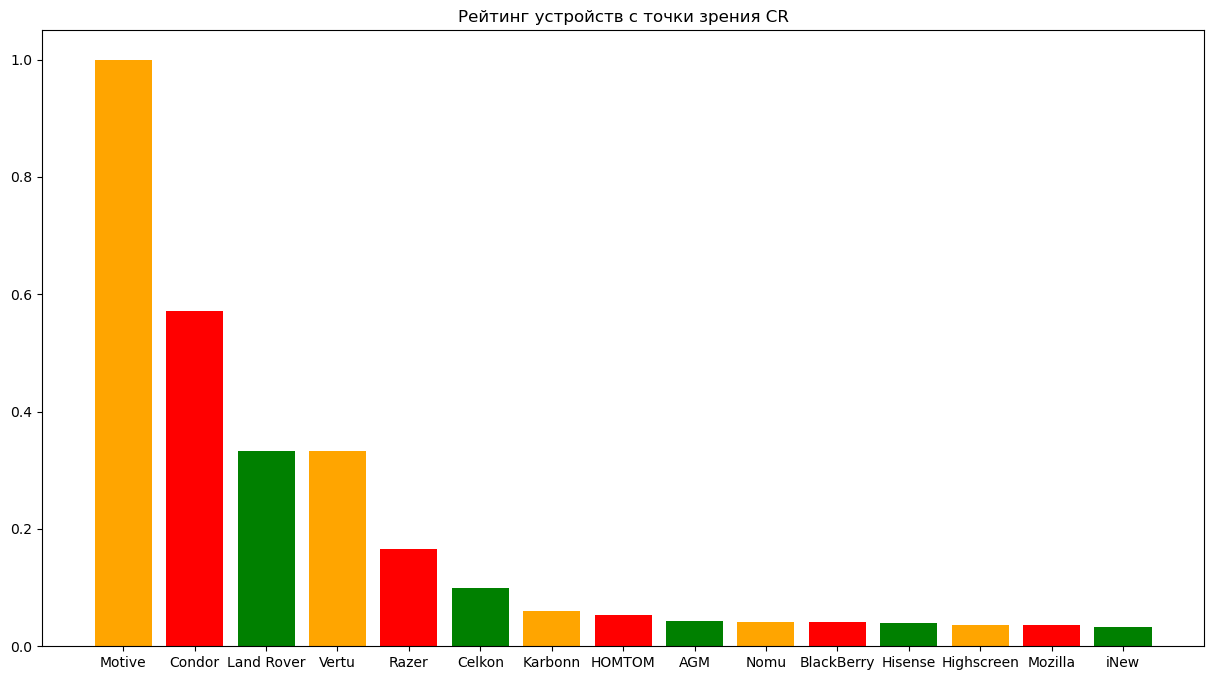

In [98]:
plt.figure(figsize=(15,8))
plt.bar(stats_device.device_brand, stats_device.CR.sort_values(ascending=False), color=['orange', 'red', 'green'])
plt.title('Рейтинг устройств с точки зрения CR')
plt.show();

In [99]:
stats = df_events.groupby(['device_brand'], as_index=False)[['session_id']].count()
stats =stats.sort_values(by=[ 'session_id'], ascending=False)[:10]
stats

,device_brand,session_id
4,Apple,14467
66,other,11518
49,Samsung,10054
62,Xiaomi,6592
23,Huawei,4519
0,(not set),454
48,Realme,421
41,OPPO,396
59,Vivo,322
39,Nokia,165


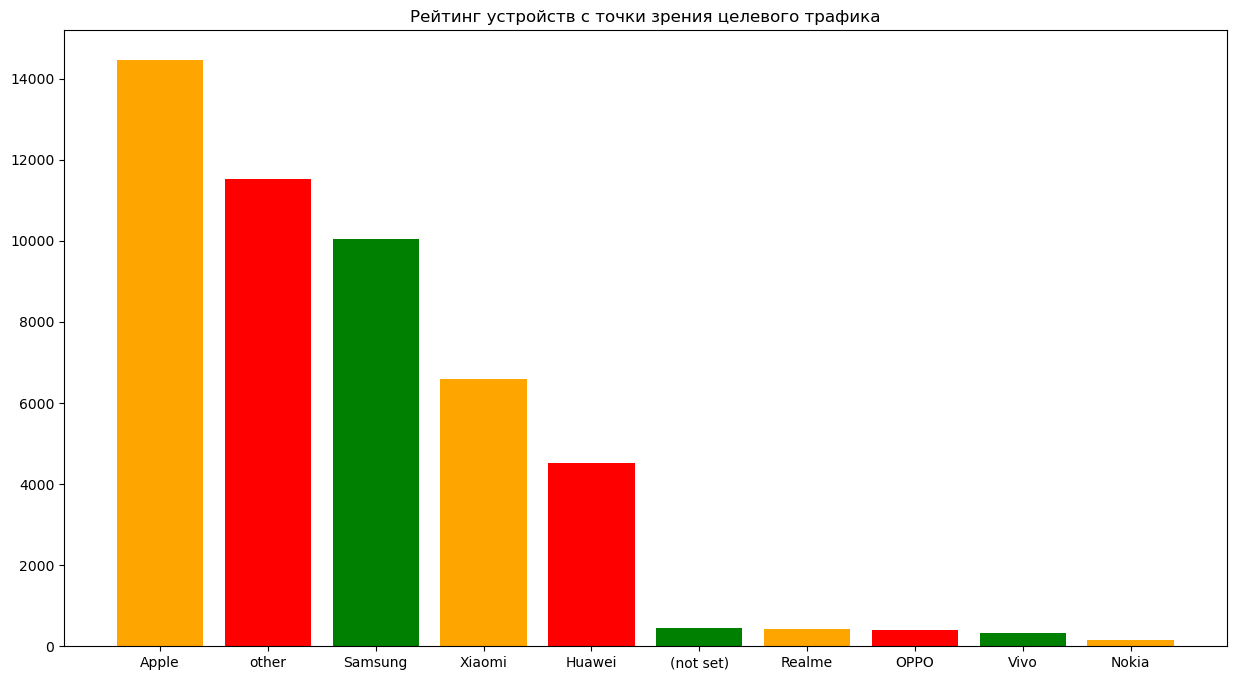

In [100]:
plt.figure(figsize=(15,8))
plt.bar(stats.device_brand, stats.session_id, color=['orange', 'red', 'green'])
plt.title('Рейтинг устройств с точки зрения целевого трафика')
plt.show();

### Вывод: основной целевой трафик приходит с четырех устройств Apple, Samsung, Xiaomi и Huawei . наличие 2ой по популярности колонки other связано, вероятно, с пробелом в сборе данных. С точки зрения CR лучший показатель у устройства Motive(CR =1), но с него был всего 1 заказ.



## <a name="section_2"></a> Рейтинг кампаний, с которых идет объём целевого трафика, и с точки зрения CR

In [101]:
stats_campaign_CR = df_an.groupby(['utm_campaign'], as_index=False).agg({'session_id':'count', 'target':'sum'})

stats_campaign_CR['CR'] = stats_campaign_CR.apply(lambda x: x.target/x.session_id, axis=1)

stats_campaign_CR =stats_campaign_CR.sort_values(by=[ 'CR'], ascending=False)[:15]
stats_campaign_CR

,utm_campaign,session_id,target,CR
95,MHdHrBKQwbDaRalwnlJq,1,1.0,1.000000
69,JkhCpeDGCtTwhwqWLywv,1,1.0,1.000000
58,IRKNegNgOUQLwudzMElF,8,7.0,0.875000
145,SbYAsCvXapXBOIxEKBZs,2,1.0,0.500000
293,lndNIerCYECRQvBTyTye,75,23.0,0.306667
72,KAcUKGokhYlMktQhYKHx,4,1.0,0.250000
368,vZqcBrFwxYPoYzJyhYGI,9,2.0,0.222222
150,TOSjvKcurFlcKJijjpYP,45,10.0,0.222222
17,CqFuKxSYgtGbcafqJwij,5,1.0,0.200000
28,DlOlXJaBJgWQVhgtCeWo,11,2.0,0.181818


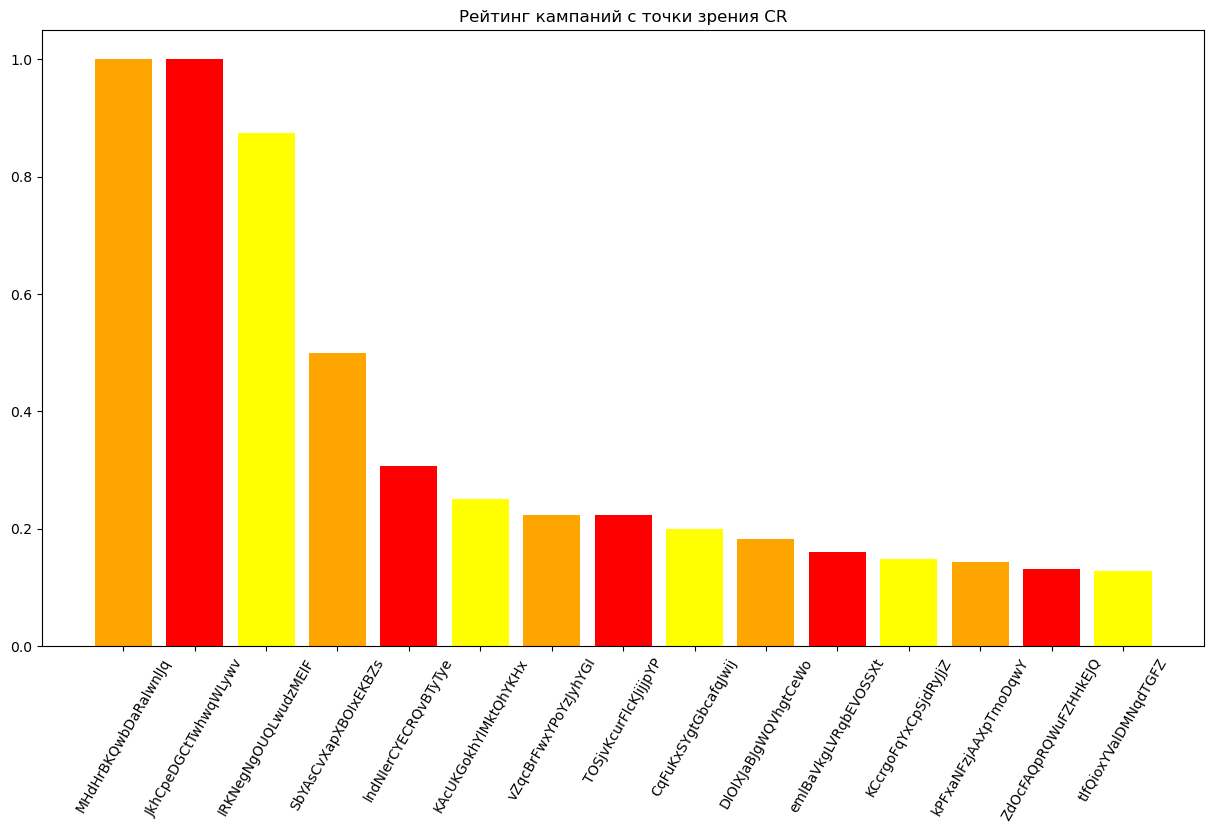

In [102]:
plt.figure(figsize=(15,8))
plt.bar(stats_campaign_CR.utm_campaign, stats_campaign_CR.CR.sort_values(ascending=False), color=['orange', 'red', 'yellow'])
plt.title('Рейтинг кампаний с точки зрения CR')
plt.xticks(rotation=60)
plt.show();

In [103]:
stats_campaign = df_events.groupby(['utm_campaign'], as_index=False)[['session_id']].count()
stats_campaign =stats_campaign.sort_values(by=[ 'session_id'], ascending=False)[:15]
stats_campaign

,utm_campaign,session_id
42,LTuZkdKfxRGVceoWkVyg,19006
40,LEoPHuyFvzoNfnzGgfcd,9348
176,other,7174
139,gecBYcKZCPMcVYdSSzKP,4545
21,FTjNLDyTrXaWYgZymFkV,2447
193,sbJRYgVfvcnqKJNDDYIr,575
110,XHNUiSKKGTEpSAlaVMFQ,401
80,SgIUDYUKnyWHVowUOqid,373
46,LwJZxKuWmvOhPsaCeRjG,285
223,zxoiLxhuSIFrCeTLQVWZ,270


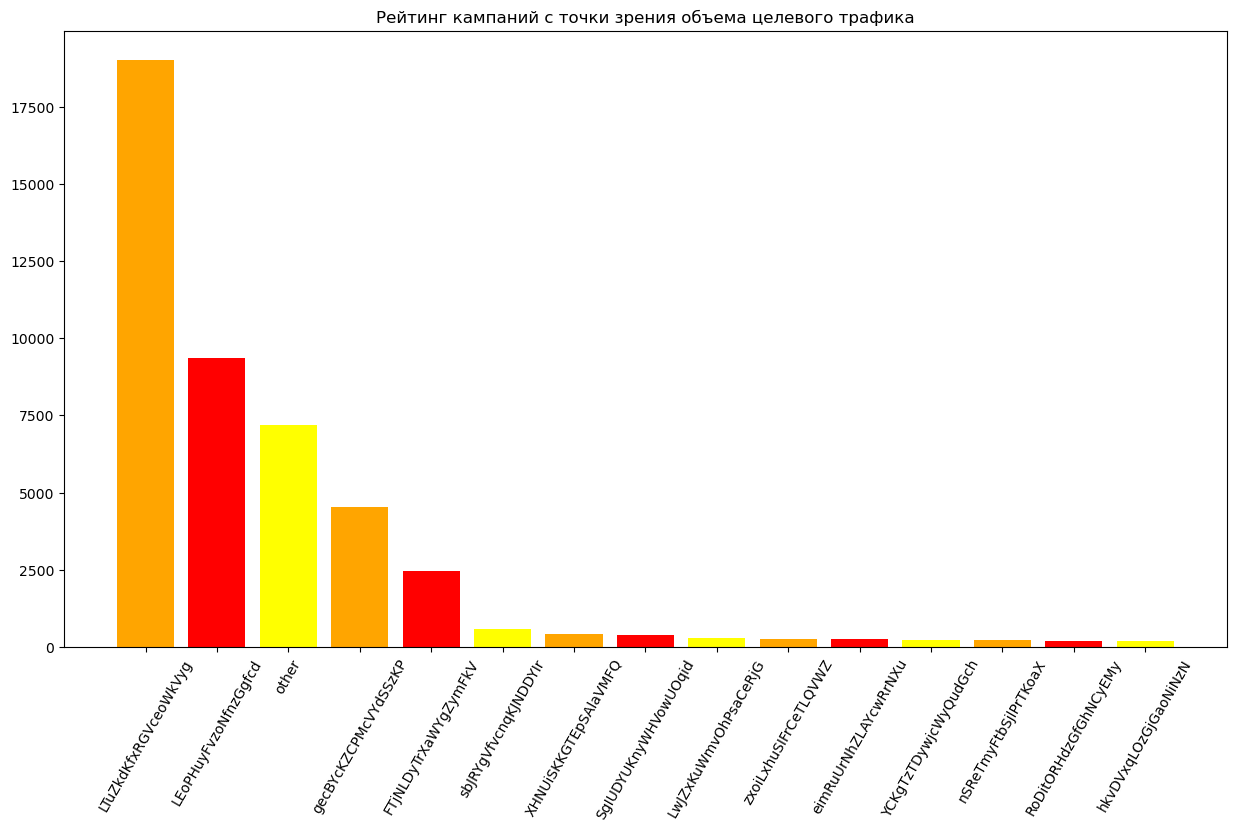

In [104]:
plt.figure(figsize=(15,8))
plt.bar(stats_campaign.utm_campaign, stats_campaign.session_id, color=['orange', 'red', 'yellow'])
plt.title('Рейтинг кампаний с точки зрения объема целевого трафика')
plt.xticks(rotation=60)
plt.show();

### Вывод: кампания LTuZkdKfxRGVceoWkVyg была самой успешной, она помогла привлечь 19004 клиента(совершения действия), что на порядок отличается от следующей в рейтинге LEoPHuyFvzoNfnzGgfcd 9348 действия. Показатели CR у этих компаний  4.5%  и 3% соответственно. С точки зрения CR лучшими проведенными компаниями являются MHdHrBKQwbDaRalwnlJq и JkhCpeDGCtTwhwqWLywv. CR у них равен 1, но каждая привлекла только по 1 клиенту.

## <a name="section_3"></a> Рейтинг локаций, с которых идет объём целевого трафика, и с точки зрения CR

In [105]:
df_an = df_an[df_an['geo_country']=='Russia']
stats_location_CR = df_an.groupby(['geo_city'], as_index=False).agg({'session_id':'count', 'target':'sum'})

stats_location_CR['CR'] = stats_location_CR.apply(lambda x: x.target/x.session_id, axis=1)

stats_location_CR =stats_location_CR.sort_values(by=['CR'], ascending=False)[:15]
stats_location_CR

,geo_city,session_id,target,CR
104,Enem,9,2.0,0.222222
234,Marks,5,1.0,0.200000
407,Tarko-Sale,18,3.0,0.166667
59,Birsk,6,1.0,0.166667
379,Shuya,13,2.0,0.153846
5,53425,20,3.0,0.150000
275,Novaya Adygeya,7,1.0,0.142857
307,Pavlovo,60,7.0,0.116667
417,Troedobelikovskiy,33,3.0,0.090909
323,Polysayevo,36,3.0,0.083333


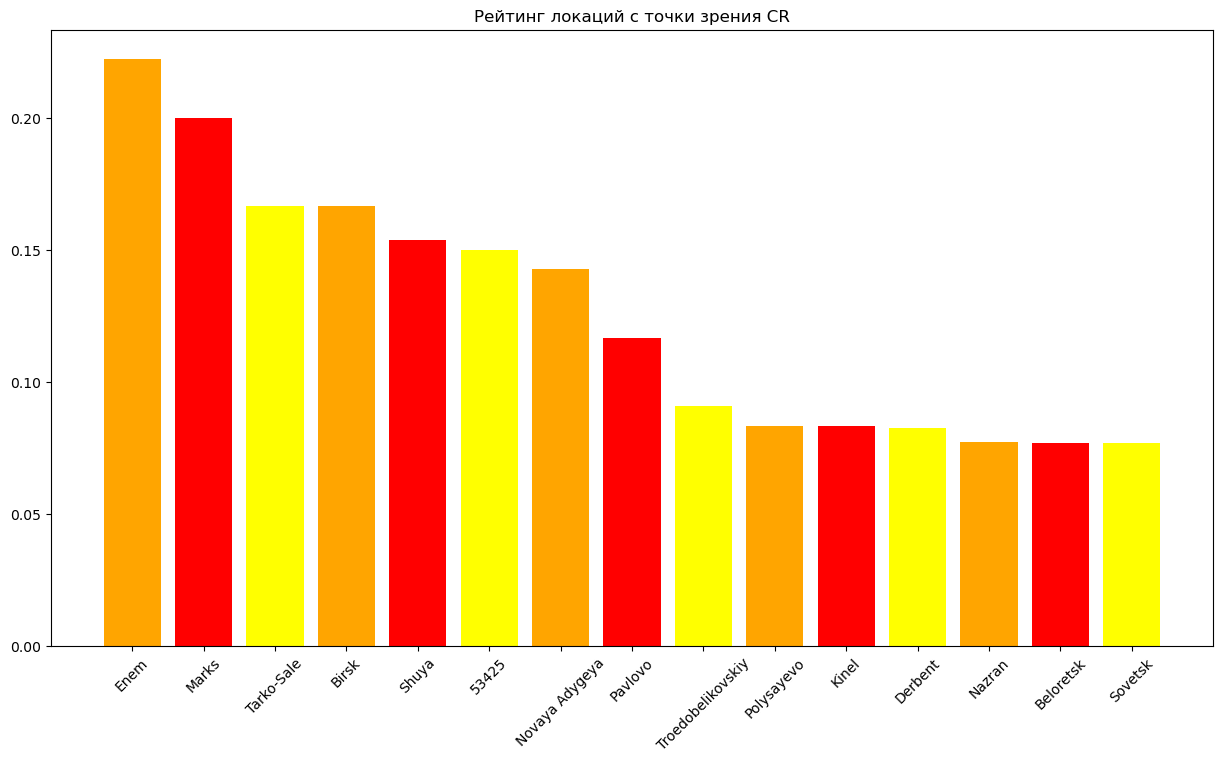

In [106]:
plt.figure(figsize=(15,8))
plt.bar(stats_location_CR.geo_city, stats_location_CR.CR.sort_values(ascending=False), color=['orange', 'red', 'yellow'])
plt.title('Рейтинг локаций с точки зрения CR')
plt.xticks(rotation=45)
plt.show();

In [107]:
stats_location = df_events.groupby(['geo_city'], as_index=False)[['session_id']].count()
stats_location =stats_location.sort_values(by=[ 'session_id'], ascending=False)[:15]
stats_location

,geo_city,session_id
322,Moscow,23629
446,Saint Petersburg,7113
0,(not set),1588
204,Kazan,1139
249,Krasnodar,1081
610,Yekaterinburg,887
452,Samara,727
558,Ufa,639
356,Nizhny Novgorod,559
370,Novosibirsk,509


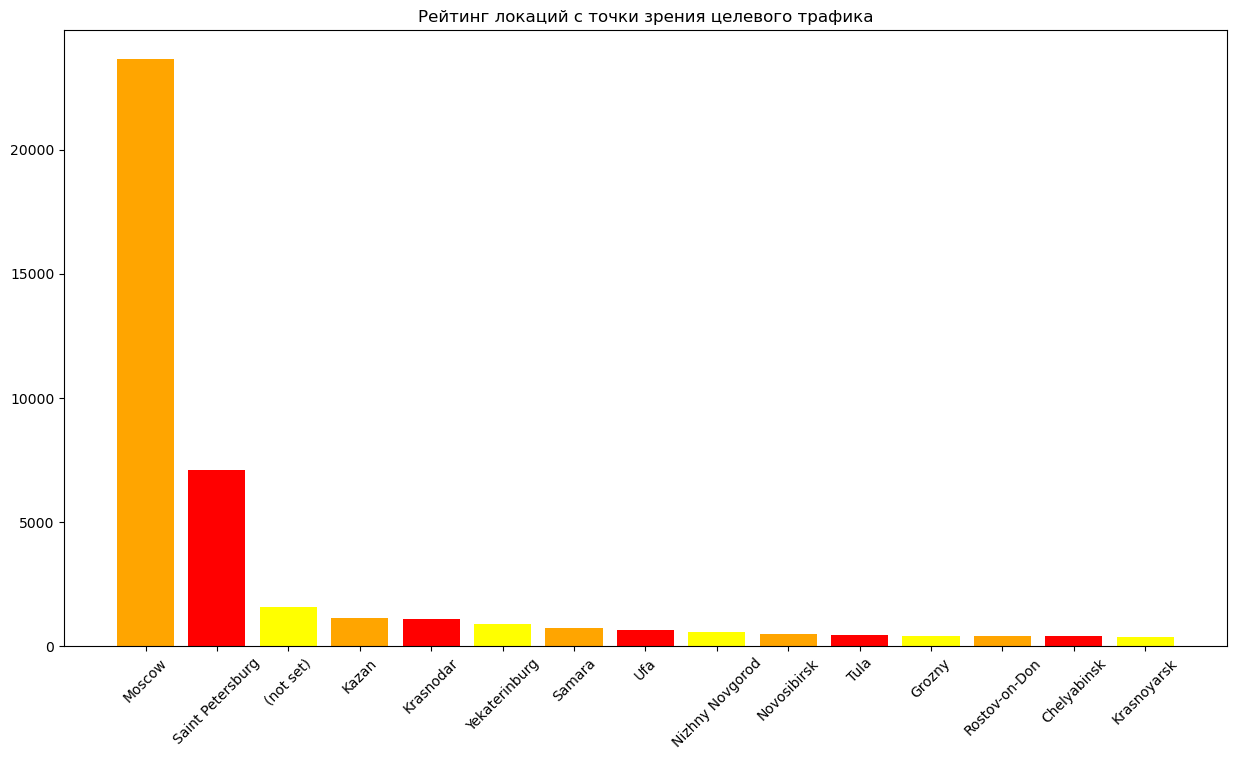

In [108]:
plt.figure(figsize=(15,8))
plt.bar(stats_location.geo_city, stats_location.session_id, color=['orange', 'red', 'yellow'])
plt.title('Рейтинг локаций с точки зрения целевого трафика')
plt.xticks(rotation=45)
plt.show();

### Вывод: Самый высокий рейтинг, ожидаемо, оказался у столиц.

#  <a name="section_i"></a> Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [109]:
columns = ['session_id','target', 'list_auto']
df_auto = pd.DataFrame(data=df_hits, columns = columns)
df_events_auto = df_auto[df_auto['target']==1]
df_events_auto

,session_id,target,list_auto
4016,2744563715298057088.1640258436.1640258436,1.0,kia_rio
4045,3087297479839089634.1640268774.1640268774,1.0,skoda_rapid
4046,3156966333326004302.1640206419.1640206800,1.0,skoda_rapid
4047,3750243879753098158.1640272208.1640272208,1.0,nissan_x-trail
4048,7518333712042258254.1640258901.1640258901,1.0,mercedes-benz_gla-klasse
...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,1.0,lada-vaz_vesta
15725133,965861352491898977.1636751459.1636751459,1.0,volkswagen_polo
15725134,4727705172767122620.1636818847.1636818847,1.0,volkswagen_polo
15725135,4727705172767122620.1636818847.1636818847,1.0,volkswagen_polo


In [110]:
popular_auto = df_events_auto.groupby(['list_auto'], as_index=False).agg({'session_id':'count'})
popular_auto = popular_auto.sort_values(by=[ 'session_id'], ascending=False)[:15]
popular_auto

,list_auto,session_id
60,other_other,72909
75,skoda_rapid,5903
38,lada-vaz_vesta,5199
86,volkswagen_polo,4590
32,kia_rio,1437
71,skoda_karoq,1300
46,mercedes-benz_e-klasse,1242
79,toyota_camry,1145
69,renault_logan,893
58,nissan_qashqai,883


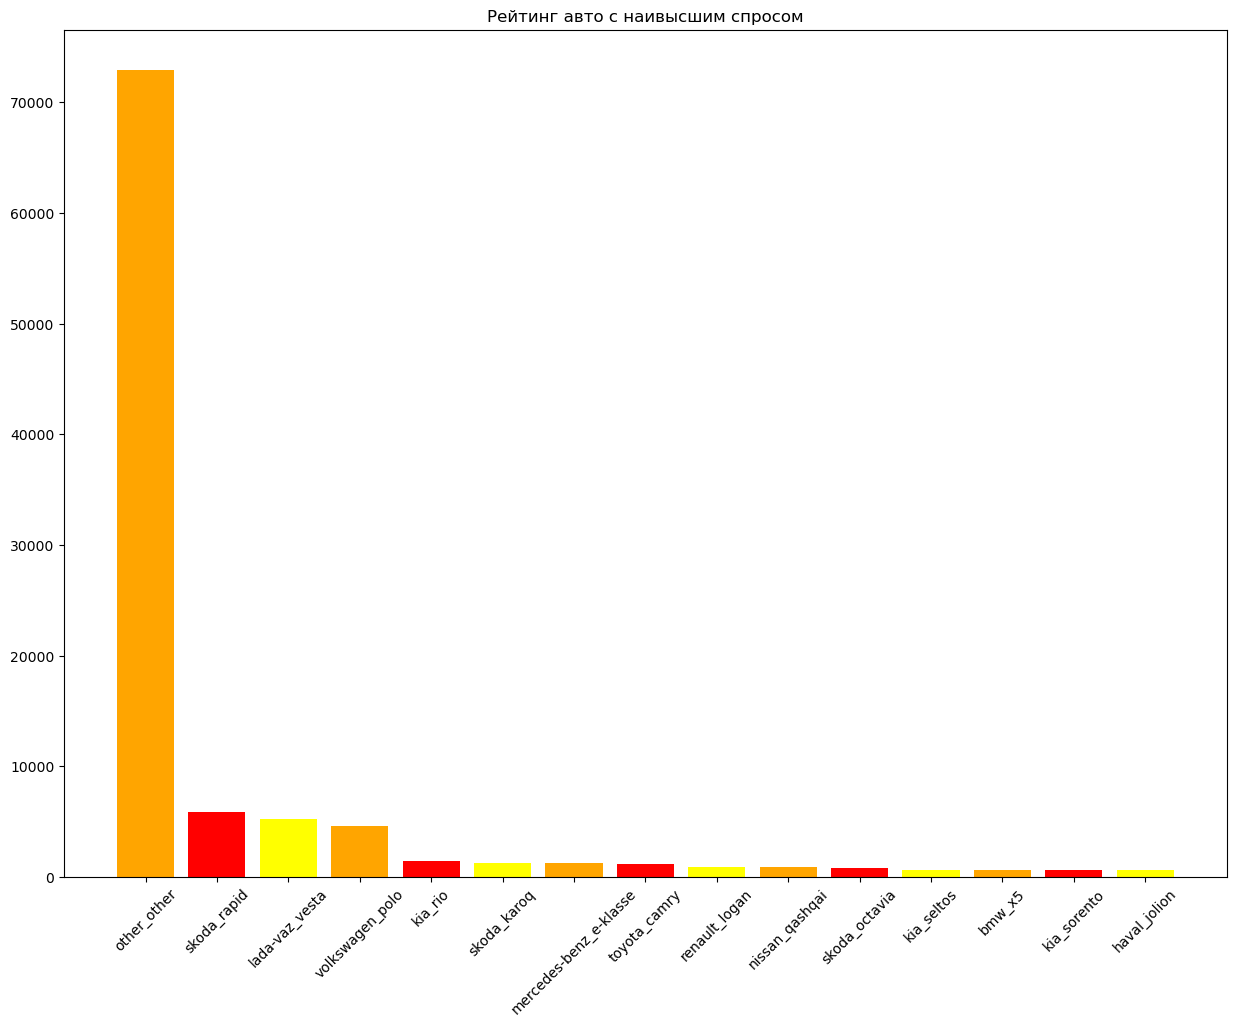

In [111]:
plt.figure(figsize=(15,11))
plt.bar(popular_auto.list_auto, popular_auto.session_id, color=['orange', 'red', 'yellow'])
plt.title('Рейтинг авто с наивысшим спросом')
plt.xticks(rotation=45)
plt.show();

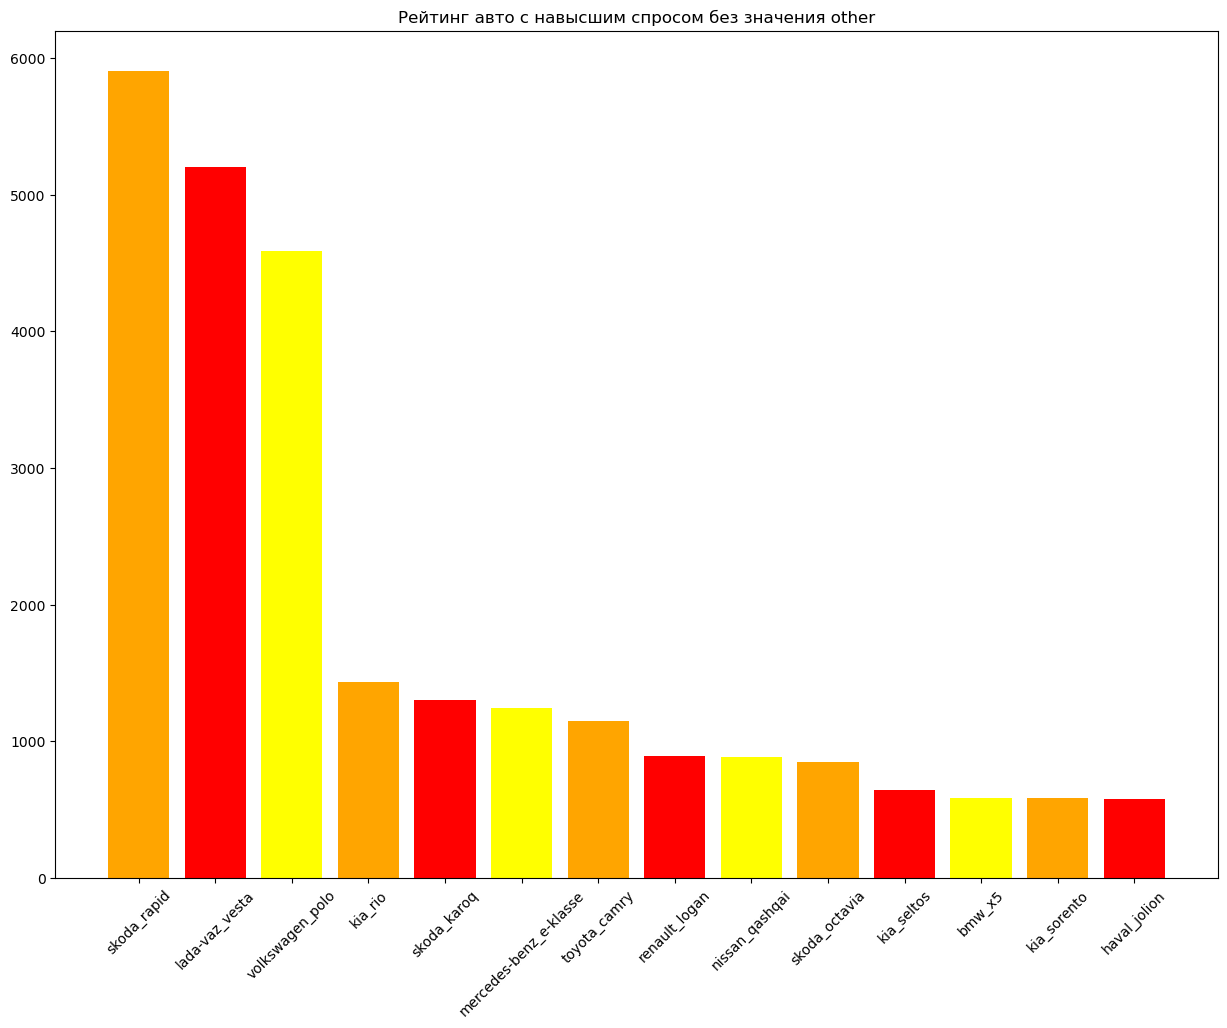

In [112]:
popular_auto = popular_auto.sort_values(by=[ 'session_id'], ascending=False)[1:15]
plt.figure(figsize=(15,11))
plt.bar(popular_auto.list_auto, popular_auto.session_id, color=['orange', 'red', 'yellow'])
plt.title('Рейтинг авто с навысшим спросом без значения other')
plt.xticks(rotation=45)
plt.show();

### Вывод: skoda_rapid, lada_vesta и volkswagen_polo пользуются наибольшим спросом. Значение other связан с недостатком сбора данных

### Показатель CR для автомобилей

In [113]:
popular_auto_CR = df_auto.groupby(['list_auto'], as_index=False).agg({'session_id':'count', 'target':'sum'})
popular_auto_CR['CR'] = popular_auto_CR.apply(lambda x: x.target/x.session_id, axis=1)
popular_auto_CR = popular_auto_CR.sort_values(by=['CR'], ascending=False)[:15]
popular_auto_CR

,list_auto,session_id,target,CR
45,hawtai_other,2,2.0,1.000000
39,gaz_gls-klasse,13,2.0,0.153846
27,bmw_x1,130,12.0,0.092308
51,infiniti_qx60,211,18.0,0.085308
29,bmw_x3-m,619,49.0,0.079160
116,renault_arkana,1718,132.0,0.076834
8,audi_rapid,15,1.0,0.066667
30,bmw_x4-m,91,5.0,0.054945
48,hyundai_other,3664,138.0,0.037664
126,tesla_other,64,2.0,0.031250


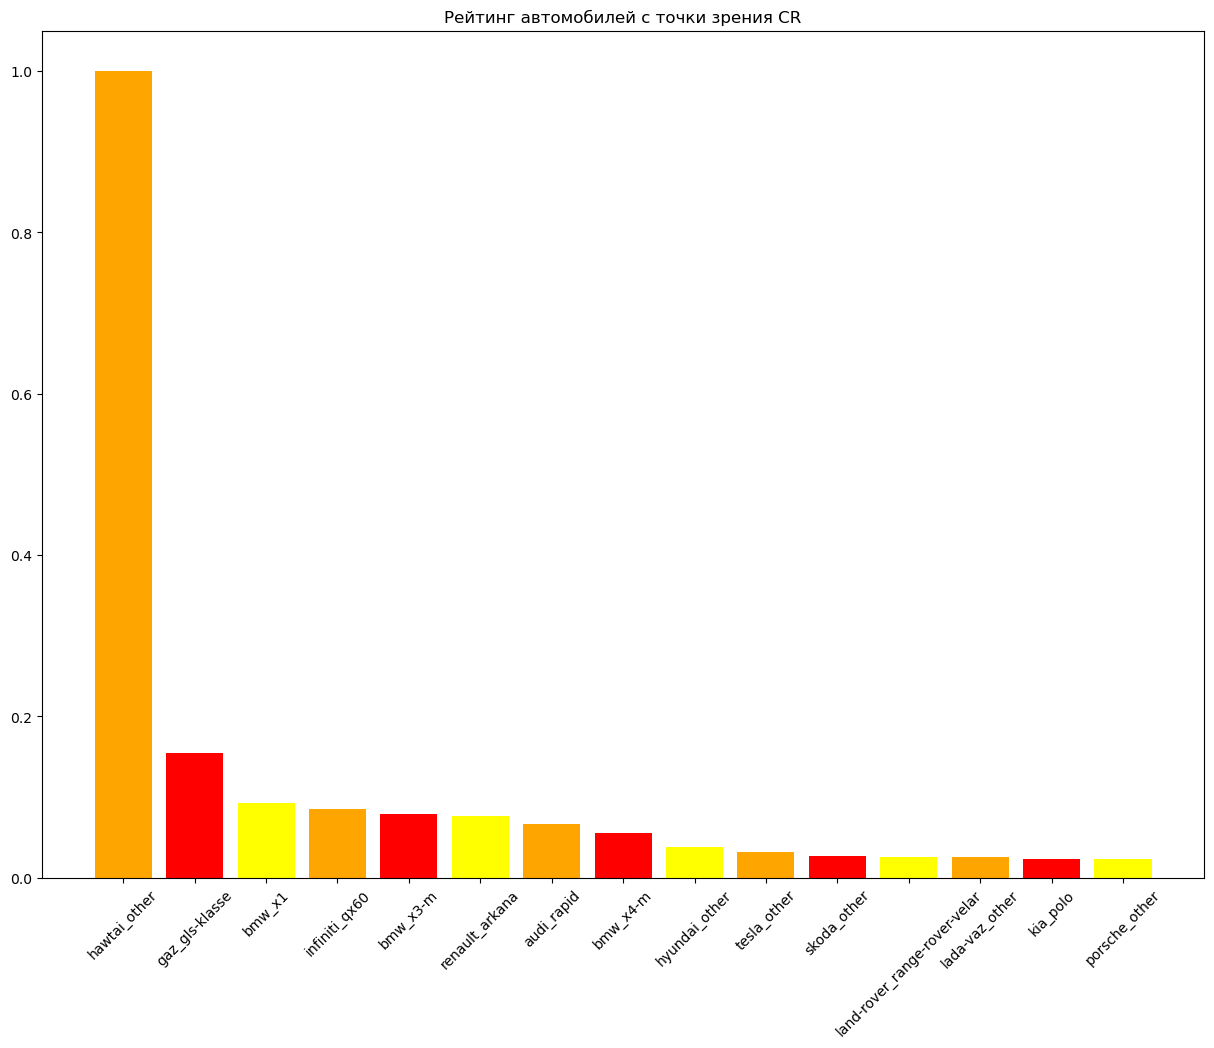

In [114]:
plt.figure(figsize=(15,11))
plt.bar(popular_auto_CR.list_auto, popular_auto_CR.CR, color=['orange', 'red', 'yellow'])
plt.title('Рейтинг автомобилей с точки зрения CR')
plt.xticks(rotation=45)
plt.show();

### Вывод: самый лучший показатель CR (Conversion Rate) в целевые события у  автомобиля hawtai(модель неизвестна). Автомобиль явно специально заказан.

#  <a name="section_j"></a> Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [115]:
advertising =['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm']

In [116]:
# самые популярные 15 каналов
df_topchannel = df_work.groupby(['utm_source'], as_index=False)[['session_id']].count()
df_topchannel = df_topchannel.sort_values(by='session_id', ascending=False)[:15]
topchannel = df_topchannel.utm_source.unique()
topchannel

array(['ZpYIoDJMcFzVoPFsHGJL', 'fDLlAcSmythWSCVMvqvL',
       'kjsLglQLzykiRbcDiGcD', 'MvfHsxITijuriZxsqZqt',
       'BHcvLfOaCWvWTykYqHVe', 'bByPQxmDaMXgpHeypKSM',
       'QxAxdyPLuQMEcrdZWdWb', 'aXQzDWsJuGXeBXexNHjc',
       'jaSOmLICuBzCFqHfBdRg', 'RmEBuqrriAfAVsLQQmhk',
       'PlbkrSYoHuZBWfYjYnfw', 'vFcAhRxLfOWKhvxjELkx',
       'hTjLvqNxGggkGnxSCaTm', 'gDBGzjFKYabGgSPZvrDH',
       'fgymSoTvjKPEgaIJqsiH'], dtype=object)

In [117]:
df_CR_analytic = df_work[df_work['utm_source'].isin(topchannel)]
df_CR_analytic = df_CR_analytic.groupby(['utm_source'], as_index=False).agg({'target':'sum', 'session_id':'count'})
df_CR_analytic['CR'] = df_CR_analytic.apply(lambda x: x.target/x.session_id*100, axis=1)
df_CR_analytic = df_CR_analytic.sort_values(by='session_id', ascending=False)
df_CR_analytic

,utm_source,target,session_id,CR
5,ZpYIoDJMcFzVoPFsHGJL,15998.0,552555,2.895277
8,fDLlAcSmythWSCVMvqvL,10531.0,277060,3.800982
13,kjsLglQLzykiRbcDiGcD,6293.0,245178,2.566707
1,MvfHsxITijuriZxsqZqt,2249.0,175831,1.279069
0,BHcvLfOaCWvWTykYqHVe,3882.0,110963,3.498463
7,bByPQxmDaMXgpHeypKSM,5557.0,90356,6.150117
3,QxAxdyPLuQMEcrdZWdWb,1404.0,45267,3.101597
6,aXQzDWsJuGXeBXexNHjc,1827.0,29528,6.187348
12,jaSOmLICuBzCFqHfBdRg,401.0,28288,1.417562
4,RmEBuqrriAfAVsLQQmhk,139.0,27412,0.507077


In [118]:
df_advertising = df_CR_analytic[df_CR_analytic['utm_source'].isin(advertising)]
df_advertising

,utm_source,target,session_id,CR
1,MvfHsxITijuriZxsqZqt,2249.0,175831,1.279069
3,QxAxdyPLuQMEcrdZWdWb,1404.0,45267,3.101597
2,PlbkrSYoHuZBWfYjYnfw,49.0,20362,0.240644


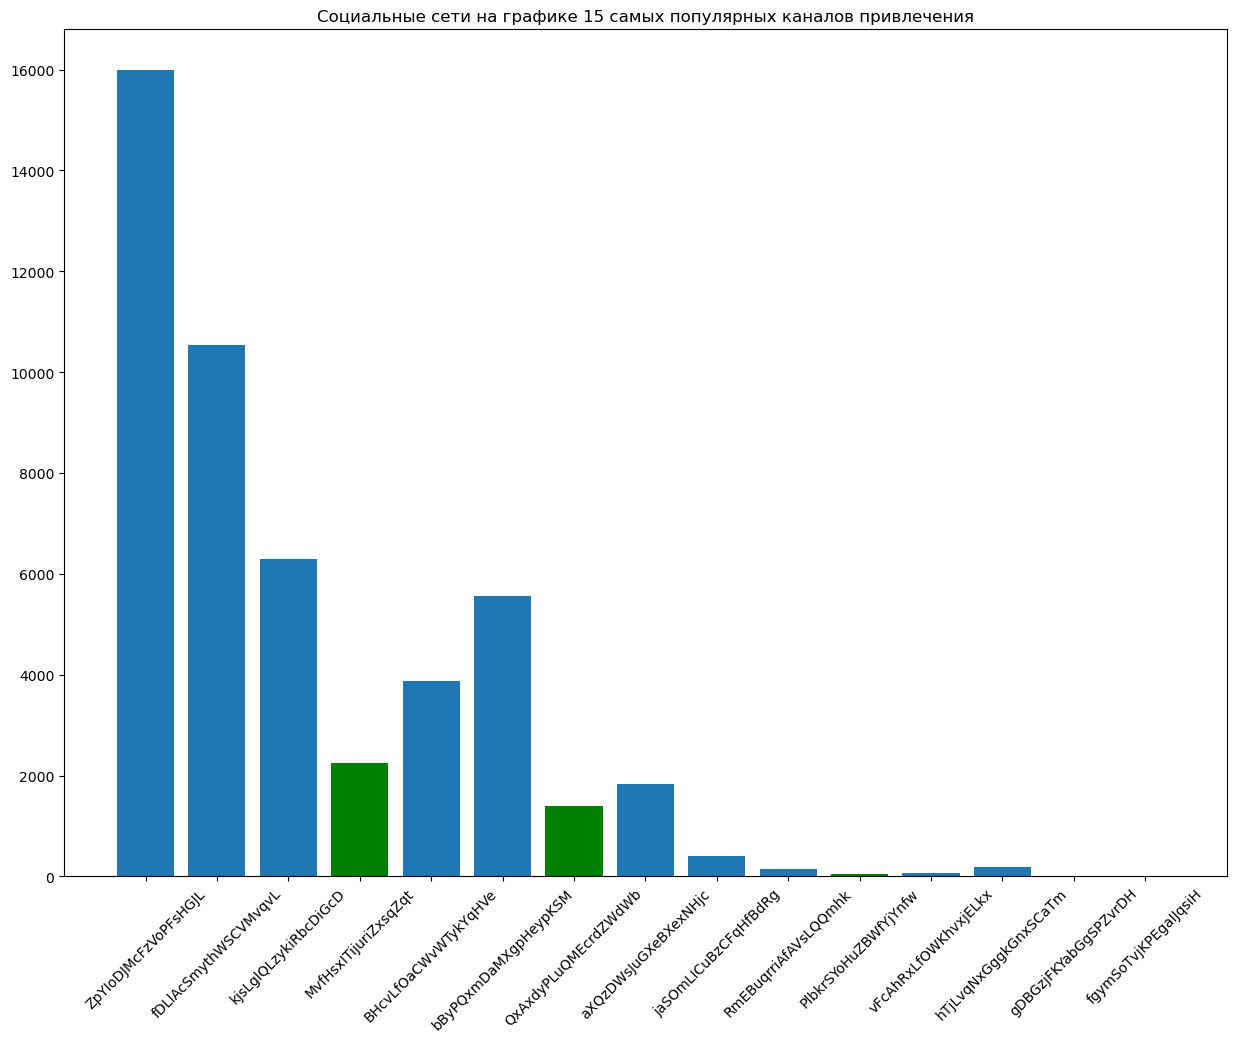

In [121]:
plt.figure(figsize=(15,11))
plt.bar(df_CR_analytic['utm_source'], df_CR_analytic['target'])
plt.bar(df_advertising['utm_source'], df_advertising['target'],color='green')
plt.xticks(rotation= 45)
plt.title('Социальные сети на графике 15 самых популярных каналов привлечения')
plt.show();

### Вывод: очевидно, что социальные сети не основной источник трафика